## **Online_shoppers_intention Data Set**

# 1.Bussiness Understanding

The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.
"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and 
"Product Related Duration" represent the number of different types of pages visited by the visitor in that session
and total time spent in each of these page categories. The values of these features are derived from the URL information 
of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.
The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page 
in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the
site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
The value of "Exit Rate" feature for a specific web page is calculated as for all page views to the page, the percentage that
were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before 
completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific
special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.
The value of this attribute is determined by considering the dynamics of e-commerce such as the duration 
between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value
 between February 2 and February 12, zero before and after this date unless it is close to another special day,
             and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region,
             traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

# **Objective**

Finding customer buying behaviour

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans, MeanShift, estimate_bandwidth
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
# for the Q-Q plots
import pylab
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import metrics

**Loading Data set**

In [2]:
OSIData = pd.read_csv("Data/online_shoppers_intention.csv") 
print(OSIData.shape)
print(OSIData.columns)
OSIData.head(10)

(12330, 18)
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   
5             0.0                      0.0            0.0   
6             0.0                     -1.0            0.0   
7             1.0                     -1.0            0.0   
8             0.0                      0.0            0.0   
9             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   
5                     0.0            19.0               154.216667   
6                    -1.0             1.0                -1.000000   
7                    -1.0             1.0                -1.000000   
8                     0.0             2.0                37.000000   
9                     0.0             3.0               738.000000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.200000   0.200000         0.0         0.0   Feb                 1   
1     0.000000   0.100000         0.0         0.0   Feb                 2   
2     0.200000   0.200000         0.0         0.0   Feb                 4   
3     0.050000   0.140000         0.0         0.0   Feb                 3   
4     0.020000   0.050000         0.0         0.0   Feb                 3   
5     0.015789   0.024561         0.0         0.0   Feb                 2   
6     0.200000   0.200000         0.0         0.4   Feb                 2   
7     0.200000   0.200000         0.0         0.0   Feb                 1   
8     0.000000   0.100000         0.0         0.8   Feb                 2   
9     0.000000   0.022222         0.0         0.4   Feb                 2   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False  
5        2       1            3  Returning_Visitor    False    False  
6        4       3            3  Returning_Visitor    False    False  
7        2       1            5  Returning_Visitor     True    False  
8        2       2            3  Returning_Visitor    False    False  
9        4       1            2  Returning_Visitor    False    False

In [3]:
print(OSIData.info())
OSIData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes:

Administrative  Administrative_Duration  Informational  \
count    12316.000000             12316.000000   12316.000000   
mean         2.317798                80.906176       0.503979   
std          3.322754               176.860432       1.270701   
min          0.000000                -1.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 8.000000       0.000000   
75%          4.000000                93.500000       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12316.000000    12316.000000             12316.000000   
mean                34.506387       31.763884              1196.037057   
std                140.825479       44.490339              1914.372511   
min                 -1.000000        0.000000                -1.000000   
25%                  0.000000        7.000000               185.000000   
50%                  0.000000       18.000000               599.766190   
75%                  0.000000       38.000000              1466.479902   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12316.000000  12316.000000  12330.000000  12330.000000   
mean       0.022152      0.043003      5.889258      0.061427   
std        0.048427      0.048527     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003119      0.025124      0.000000      0.000000   
75%        0.016684      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [4]:
OSIData.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [5]:
OSIData.isnull().mean()*100

Administrative             0.113544
Administrative_Duration    0.113544
Informational              0.113544
Informational_Duration     0.113544
ProductRelated             0.113544
ProductRelated_Duration    0.113544
BounceRates                0.113544
ExitRates                  0.113544
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.000000
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64

In [6]:
def checkForMissingData(df,value1,missValue):
  df[value1] = np.where(OSIData[missValue].isnull(),1,0)
  return df.groupby("Revenue")[value1].mean()*100


In [7]:
checkForMissingData(OSIData,"Administrative_isnull","Administrative")


Revenue
False    0.134331
True     0.000000
Name: Administrative_isnull, dtype: float64

In [8]:
checkForMissingData(OSIData,"Administrative_Duration_isnull","Administrative_Duration")

Revenue
False    0.134331
True     0.000000
Name: Administrative_Duration_isnull, dtype: float64

In [9]:
checkForMissingData(OSIData,"Informational_isnull","Informational")


Revenue
False    0.134331
True     0.000000
Name: Informational_isnull, dtype: float64

In [10]:
checkForMissingData(OSIData,"Informational_Duration_isnull","Informational_Duration")


Revenue
False    0.134331
True     0.000000
Name: Informational_Duration_isnull, dtype: float64

In [11]:
checkForMissingData(OSIData,"ProductRelated_isnull","ProductRelated")


Revenue
False    0.134331
True     0.000000
Name: ProductRelated_isnull, dtype: float64

In [12]:
checkForMissingData(OSIData,"ProductRelated_Duration_isnull","ProductRelated_Duration")


Revenue
False    0.134331
True     0.000000
Name: ProductRelated_Duration_isnull, dtype: float64

In [13]:
checkForMissingData(OSIData,"BounceRates_isnull","BounceRates")

Revenue
False    0.134331
True     0.000000
Name: BounceRates_isnull, dtype: float64

In [14]:
checkForMissingData(OSIData,"ExitRates_isnull","ExitRates")

Revenue
False    0.134331
True     0.000000
Name: ExitRates_isnull, dtype: float64

We conclude that all missing values are Not at random because when the Revenue Value is False our missing value is in greater % 0.13 where as when value of Revenue is True Missing Value is 0% 

**Check For Cardinality**

In [15]:
OSIData = OSIData.iloc[:,0:18]
for i in OSIData.columns:
   print("Number of unique values in ",i,len(OSIData[i].unique()))

Number of unique values in  Administrative 28
Number of unique values in  Administrative_Duration 3337
Number of unique values in  Informational 18
Number of unique values in  Informational_Duration 1260
Number of unique values in  ProductRelated 312
Number of unique values in  ProductRelated_Duration 9553
Number of unique values in  BounceRates 1873
Number of unique values in  ExitRates 4778
Number of unique values in  PageValues 2704
Number of unique values in  SpecialDay 6
Number of unique values in  Month 10
Number of unique values in  OperatingSystems 8
Number of unique values in  Browser 13
Number of unique values in  Region 9
Number of unique values in  TrafficType 20
Number of unique values in  VisitorType 3
Number of unique values in  Weekend 2
Number of unique values in  Revenue 2


In [16]:
for i in OSIData.columns:
   print("unique values in ",i,(OSIData[i].unique()))
   print("\n")

unique values in  Administrative [ 0.  1.  2.  4. 12.  3. 10.  6.  5.  9.  8. 16. 13. 11.  7. 18. 14. 17.
 19. 15. nan 24. 22. 21. 20. 23. 27. 26.]


unique values in  Administrative_Duration [  0.         -1.         53.        ... 167.9107143 305.125
 150.3571429]


unique values in  Informational [ 0.  1.  2.  4. 16.  5.  3. 14.  6. 12.  7. nan  9. 10.  8. 11. 24. 13.]


unique values in  Informational_Duration [  0.    -1.   120.   ... 547.75 368.25 211.25]


unique values in  ProductRelated [  1.   2.  10.  19.   3.  16.   7.   6.  23.  13.  20.   8.   5.  32.
   4.  45.  14.  52.   9.  46.  15.  22.  11.  12.  36.  42.  27.  90.
  18.  38.  17. 128.  25.  30.  21.  51.  26.  28.  31.  24.  50.  96.
  49.  68.  98.  67.  55.  35.  37.  29.  34.  71.  63.  87.  40.  33.
  54.  64.  75.  39. 111.  81.  61.  47.  44.  88. 149.  41.   0.  79.
  66.  43. 258.  80.  62.  83. 173.  48.  58.  57.  56.  69.  82.  59.
 109. 287.  53.  84.  78. 137. 113.  89.  65.  60.  nan 104. 129.  77.
  

In [17]:
# removing null values 
OSIData.dropna(axis='rows',inplace=True)
OSIData.reset_index(drop=True,inplace=True)
#Now shape of our data is 
print(OSIData.shape)
OSIData.isnull().sum()

(12316, 18)


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [18]:
numerical = ["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration",
             "BounceRates","ExitRates","PageValues"]
categorical = ["SpecialDay","Month","OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend","Revenue"]

In [19]:
#Values analyze for numerical variable
for num in numerical:
    print(num)
    print(OSIData[num].value_counts().sort_values(ascending=False))
    print()

Administrative
0.0     5754
1.0     1354
2.0     1114
3.0      915
4.0      765
5.0      575
6.0      432
7.0      338
8.0      287
9.0      225
10.0     153
11.0     105
12.0      86
13.0      56
14.0      44
15.0      38
16.0      24
17.0      16
18.0      12
19.0       6
24.0       4
22.0       4
23.0       3
20.0       2
21.0       2
26.0       1
27.0       1
Name: Administrative, dtype: int64

Administrative_Duration
 0.000000       5857
 4.000000         56
 5.000000         53
 7.000000         45
 11.000000        42
 6.000000         41
 14.000000        37
 9.000000         35
 15.000000        33
-1.000000         33
 10.000000        32
 19.000000        29
 13.000000        29
 21.000000        28
 12.000000        28
 18.000000        26
 8.000000         26
 3.000000         26
 20.000000        25
 17.000000        25
 37.000000        24
 23.000000        24
 33.000000        20
 26.000000        20
 32.000000        19
 47.000000        19
 16.000000        19
 34.000

In [20]:
# We have to remove negative values 
for num in numerical:
  OSIData[num]=np.where(OSIData[num]<0,0,OSIData[num])

In [21]:
OSIData.describe()

Administrative  Administrative_Duration  Informational  \
count    12316.000000             12316.000000   12316.000000   
mean         2.317798                80.908856       0.503979   
std          3.322754               176.859199       1.270701   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 8.000000       0.000000   
75%          4.000000                93.500000       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12316.000000    12316.000000             12316.000000   
mean                34.509067       31.763884              1196.039736   
std                140.824813       44.490339              1914.370836   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               185.000000   
50%                  0.000000       18.000000               599.766190   
75%                  0.000000       38.000000              1466.479902   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12316.000000  12316.000000  12316.000000  12316.000000   
mean       0.022152      0.043003      5.895952      0.061497   
std        0.048427      0.048527     18.577926      0.199020   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003119      0.025124      0.000000      0.000000   
75%        0.016684      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12316.000000  12316.000000  12316.000000  12316.000000  
mean           2.124147      2.357584      3.148019      4.070477  
std            0.911566      1.718028      2.402211      4.024598  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [22]:
#Values analyze for categorical variable
for cat in categorical:
    print(cat)
    print(OSIData[cat].value_counts().sort_values(ascending=False))
    print()

SpecialDay
0.0    11065
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

Month
May     3363
Nov     2998
Mar     1894
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

OperatingSystems
2    6593
1    2582
3    2552
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

Browser
2     7951
1     2459
4      735
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

Region
1    4774
3    2402
4    1179
2    1134
6     804
7     761
9     511
8     434
5     317
Name: Region, dtype: int64

TrafficType
2     3909
1     2444
3     2051
4     1069
13     737
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      37
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

VisitorType

# Univariate Analysis of categorical Variable

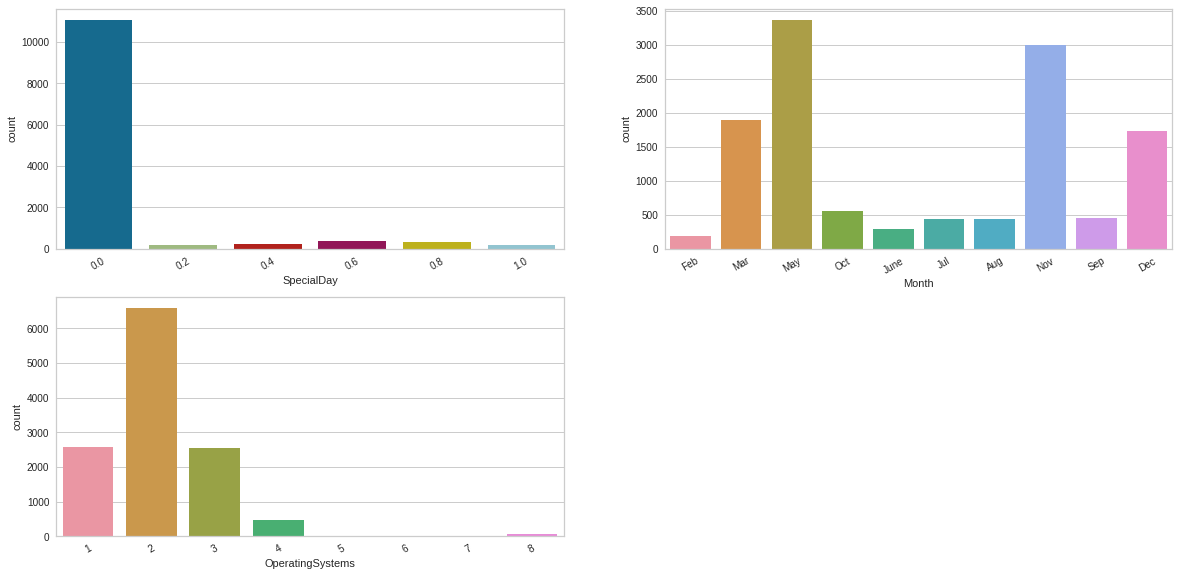

In [23]:
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in categorical[0:3]:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data =OSIData, x = cat)
    plt.xticks(rotation=30)
plt.show()


1.   Special Day 0.0 occur most time.
2.   May and November occur mostly then other months.
3.   Number 2 operating system used mostly.

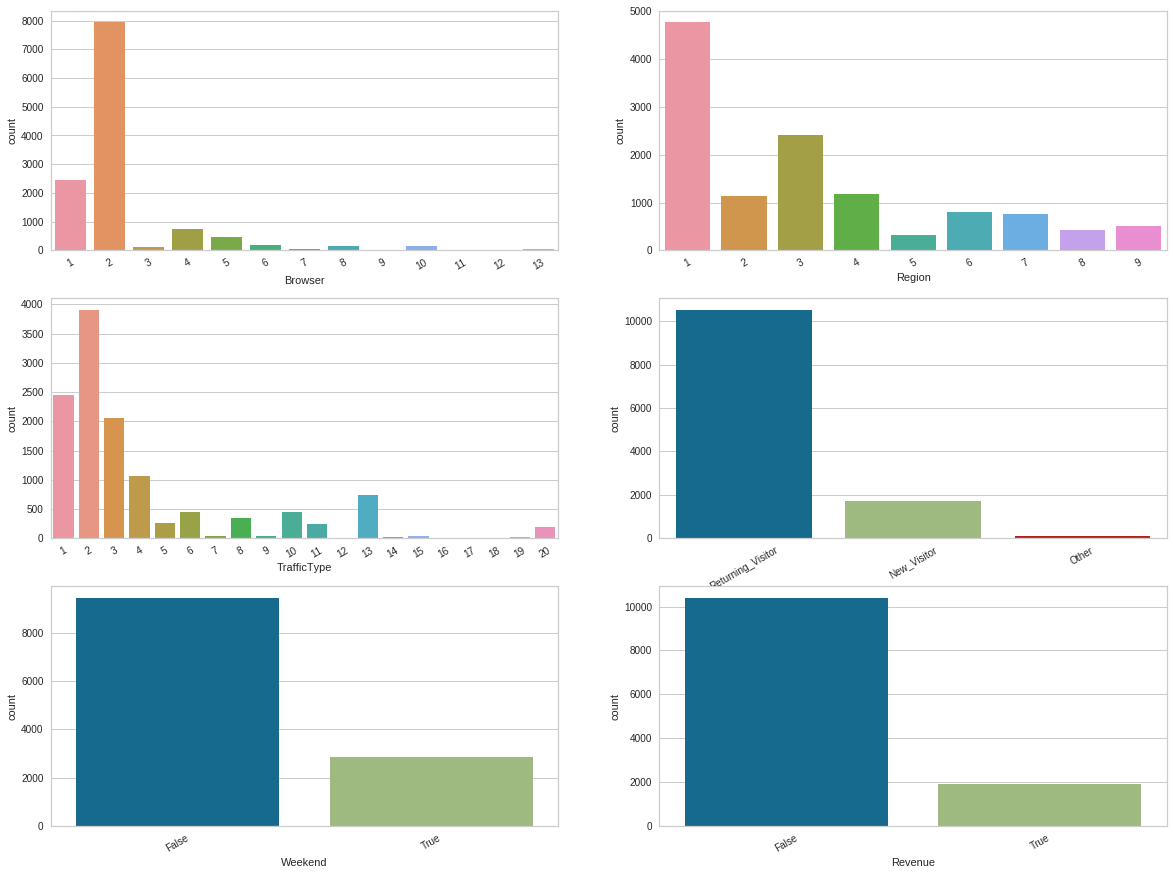

In [24]:
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in categorical[3:]:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data =OSIData, x = cat)
    plt.xticks(rotation=30)
plt.show()



   
1.   Number 2 browser used more than other browser
2.   user of region 1 are highest in online search
3.   Number 2 traffic type is greater in number  than other trafic type
4.   Returning visitor are more than other visitor
5.   Searches is done more in odd days 
6.   Mostly the revenue is not generated 






### **Multicolinearity**

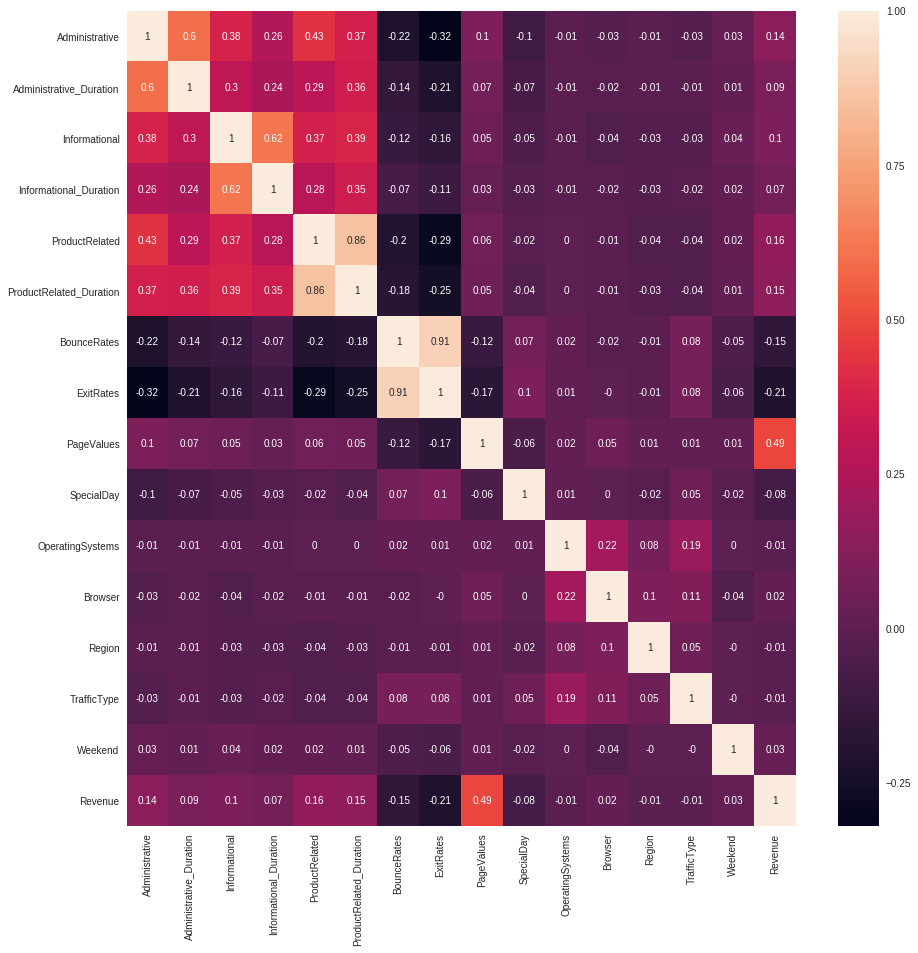

In [25]:
# we calculate the correlations using pandas corr
# and we round the values to 2 decimals
correlation_matrix = OSIData.corr().round(2)

# plot the correlation matrix usng seaborn
# annot = True to print the correlation values
# inside the squares

figure = plt.figure(figsize=(15, 15))
sns.heatmap(data=correlation_matrix, annot=True)

From the above correlation we notice that 

    administrative and administrative duration are highly correlated 

    Informational and Informational Duration  are highly correlated 

    Product and Product duration are highly correlated 

    Exit and bounce rate are highly correlated 
    
    Page Value is highly corelated with target variable Revenue.


# **Bivariate  Analysis**

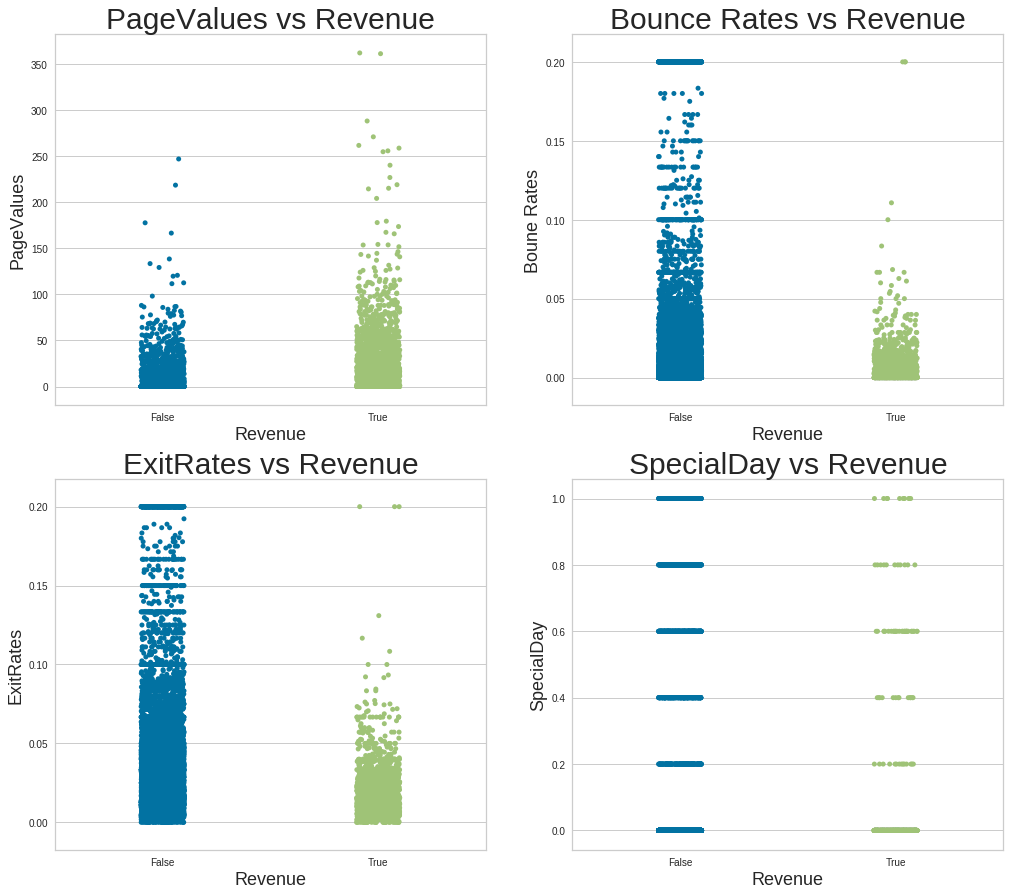

In [26]:
plt.figure(figsize=(17,15))
# PageValues vs Revenue
plt.subplot(2, 2, 1)
sns.stripplot(OSIData['Revenue'], OSIData['PageValues'])
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 18)
plt.ylabel('PageValues', fontsize = 18)

# bounce rates vs Revenue
plt.subplot(2, 2, 2)
sns.stripplot(OSIData['Revenue'], OSIData['BounceRates'])
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 18)
plt.ylabel('Boune Rates', fontsize = 18)

# ExitRates vs Revenue
plt.subplot(2, 2, 3)
sns.stripplot(OSIData['Revenue'], OSIData['ExitRates'])
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 18)
plt.ylabel('ExitRates', fontsize = 18)

# SpecialDay vs Revenue
plt.subplot(2, 2, 4)
sns.stripplot(OSIData['Revenue'], OSIData['SpecialDay'])
plt.title('SpecialDay vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 18)
plt.ylabel('SpecialDay', fontsize = 18)

plt.show()

# Bounce Rate With Durations

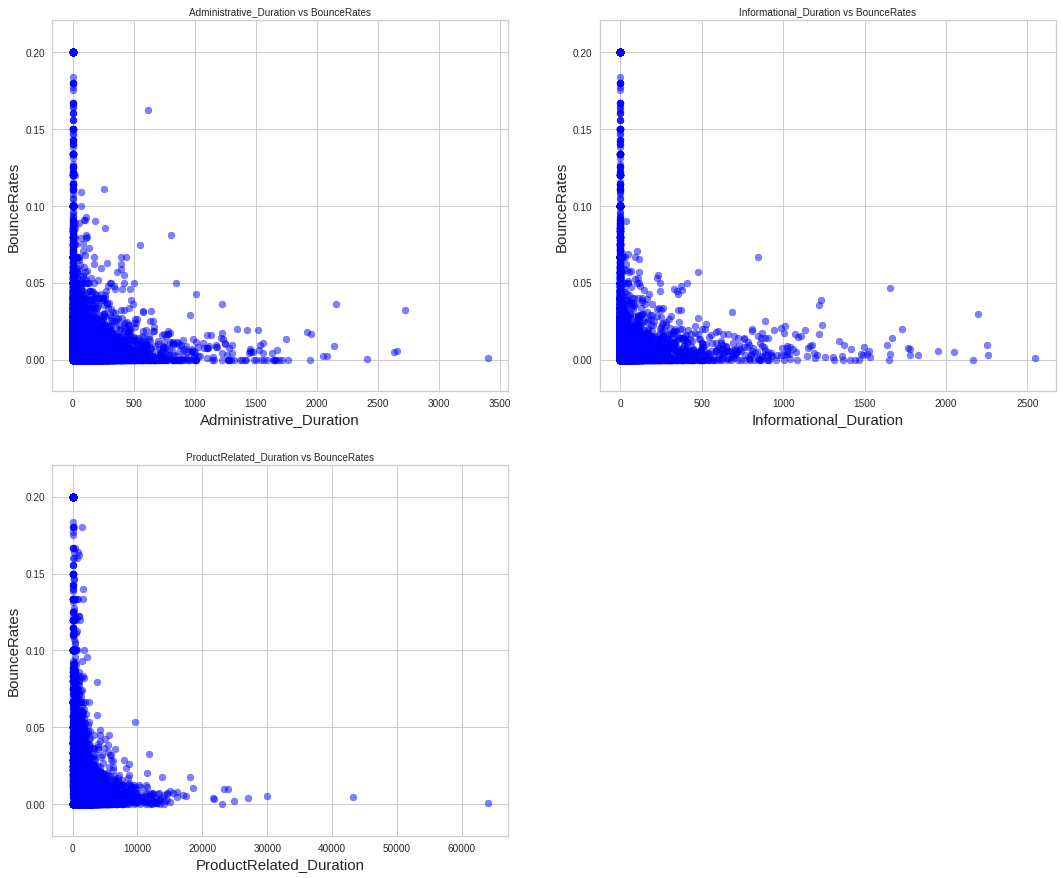

In [27]:
#How does longer duration spent on the website affect the bounce rate?

plt.figure(figsize=(18,15))
# PageValues vs revenue
plt.subplot(2, 2, 1)
plt.scatter(OSIData['Administrative_Duration'], OSIData['BounceRates'],c='blue', alpha=0.5)
plt.title('Administrative_Duration vs BounceRates', fontsize = 10)
plt.xlabel('Administrative_Duration', fontsize = 15)
plt.ylabel('BounceRates', fontsize = 15)

# bounce rates vs revenue
plt.subplot(2, 2, 2)
plt.scatter(OSIData['Informational_Duration'], OSIData['BounceRates'], c='blue', alpha=0.5)
plt.title('Informational_Duration vs BounceRates', fontsize = 10)
plt.xlabel('Informational_Duration', fontsize = 15)
plt.ylabel('BounceRates', fontsize = 15)

# ExitRates vs revenue
plt.subplot(2, 2, 3)
plt.scatter(OSIData['ProductRelated_Duration'], OSIData['BounceRates'],c='blue', alpha=0.5)
plt.title('ProductRelated_Duration vs BounceRates', fontsize = 10)
plt.xlabel('ProductRelated_Duration', fontsize = 15)
plt.ylabel('BounceRates', fontsize = 15)


plt.show()

Above graph represent as when duration increase bounce rate is start reducing

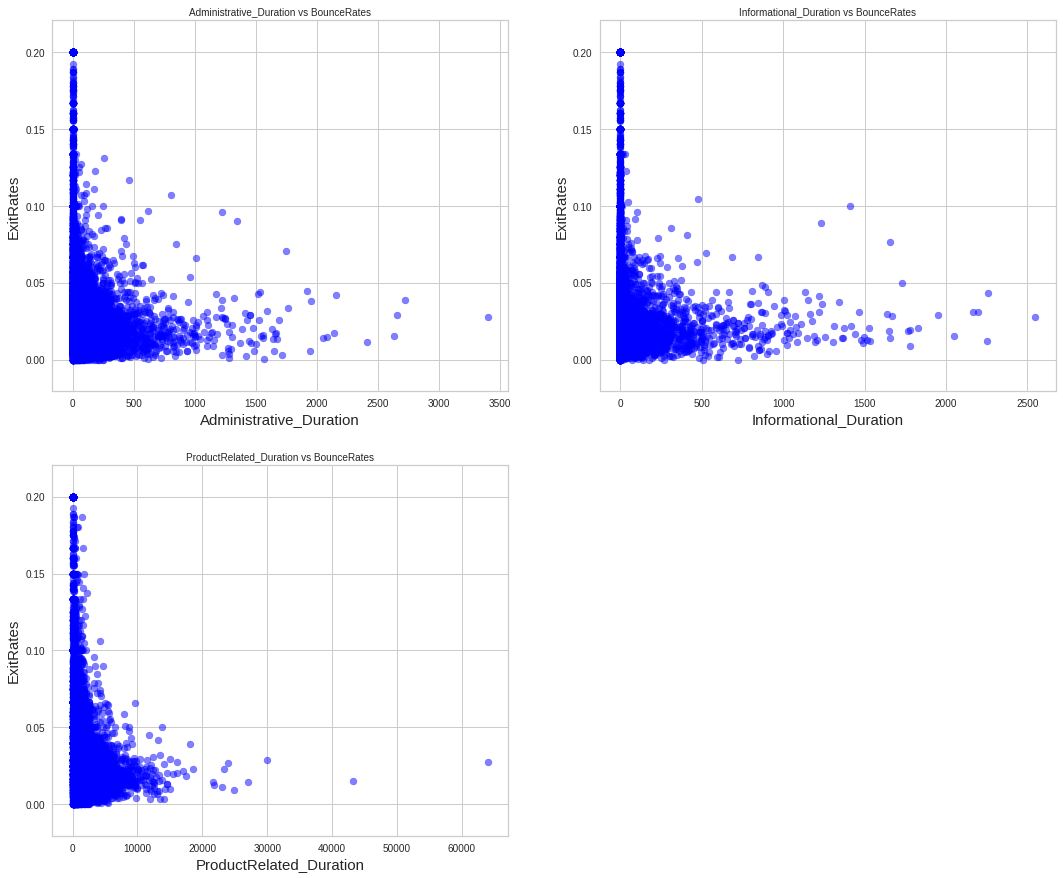

In [28]:
plt.figure(figsize=(18,15))
# exit rate  vs administrative duration
plt.subplot(2, 2, 1)
plt.scatter(OSIData['Administrative_Duration'], OSIData['ExitRates'],c='blue', alpha=0.5)
plt.title('Administrative_Duration vs BounceRates', fontsize = 10)
plt.xlabel('Administrative_Duration', fontsize = 15)
plt.ylabel('ExitRates', fontsize = 15)

# exit rates vs info duration
plt.subplot(2, 2, 2)
plt.scatter(OSIData['Informational_Duration'], OSIData['ExitRates'], c='blue', alpha=0.5)
plt.title('Informational_Duration vs BounceRates', fontsize = 10)
plt.xlabel('Informational_Duration', fontsize = 15)
plt.ylabel('ExitRates', fontsize = 15)

# ExitRates vs product duration
plt.subplot(2, 2, 3)
plt.scatter(OSIData['ProductRelated_Duration'], OSIData['ExitRates'],c='blue', alpha=0.5)
plt.title('ProductRelated_Duration vs BounceRates', fontsize = 10)
plt.xlabel('ProductRelated_Duration', fontsize = 15)
plt.ylabel('ExitRates', fontsize = 15)


plt.show()

### **Check For Normality**

In [29]:
OSIData.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

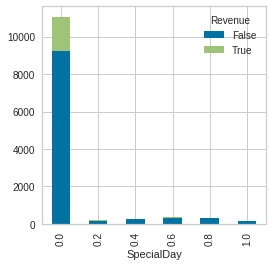

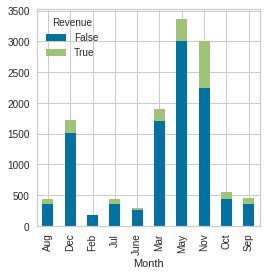

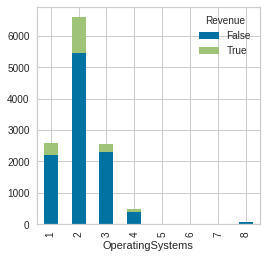

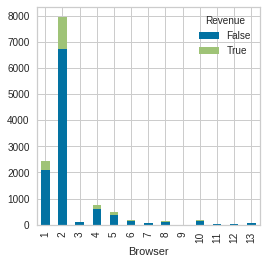

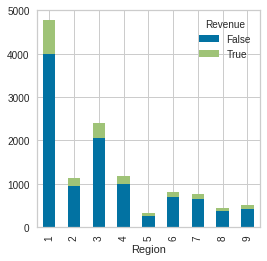

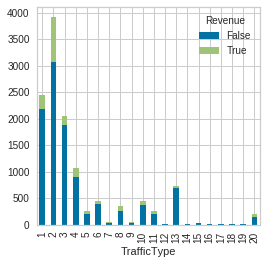

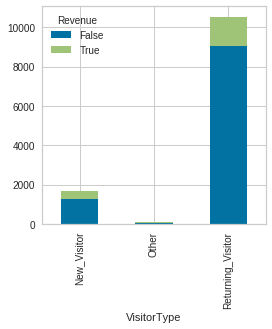

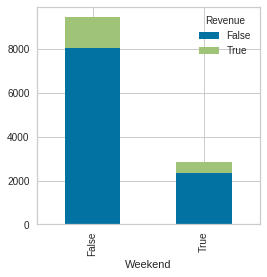

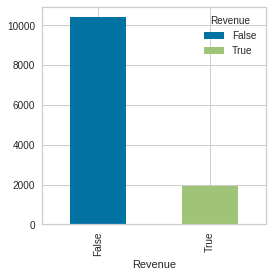

In [30]:
for cat in categorical:
    tab = pd.crosstab(OSIData[cat],OSIData["Revenue"])
    tab.plot(kind ='bar',figsize=(4,4),stacked=True)

### **Analyze Visitor Types of both Who did purchased or not with different Categorical Features**

In [31]:
TRevenue=OSIData[OSIData['Revenue']==True]
FRevenue=OSIData[OSIData['Revenue']==False]

Text(0.5, 1.0, 'Relationship of Visitor Type With Region')

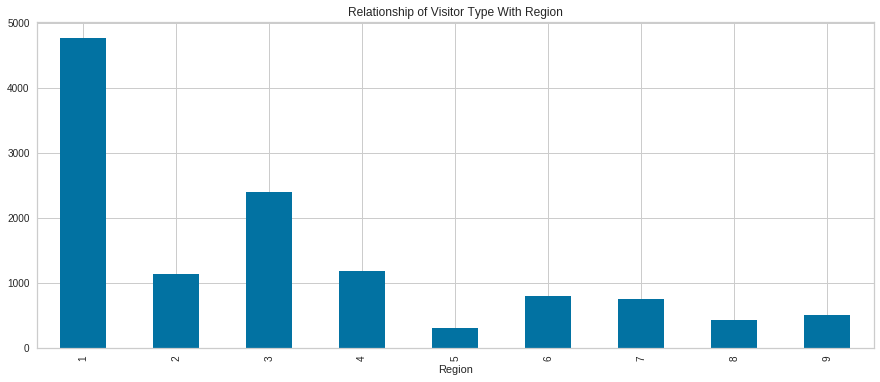

In [32]:
#Where does most of the customers visiting the website belonging to?? identify the regions)
OSIData.groupby("Region")["VisitorType"].count().plot('bar',figsize=(15,6))
plt.title("Relationship of Visitor Type With Region")

Text(0.5, 1.0, 'Relationship of Traffic  Type With Revenue')

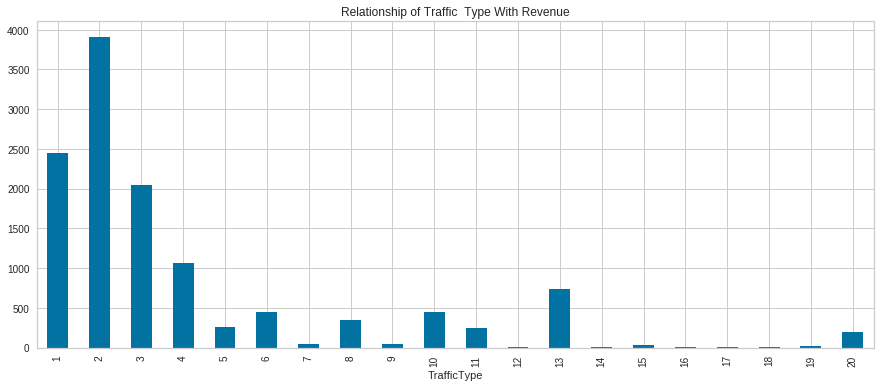

In [33]:
OSIData.groupby("TrafficType")["Revenue"].count().plot('bar',figsize=(15,6))
plt.title("Relationship of Traffic  Type With Revenue")

Text(0.5, 1.0, 'Relationship of Traffic  Type With Serious Buyer who generate Revenue')

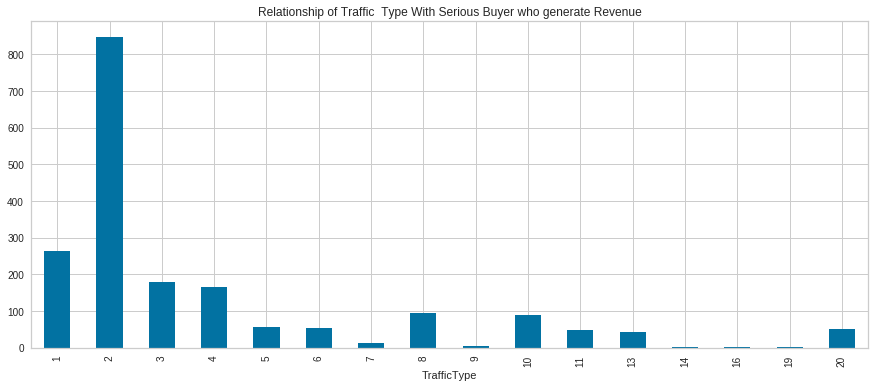

In [34]:
#Serious Buyer who generate Revenue relation with Traffic Type


TRevenue.groupby("TrafficType")["Revenue"].count().plot('bar',figsize=(15,6))
plt.title("Relationship of Traffic  Type With Serious Buyer who generate Revenue")

Text(0.5, 1.0, 'Relationship of Traffic  Type With Non Serious Buyer who did not Prchased')

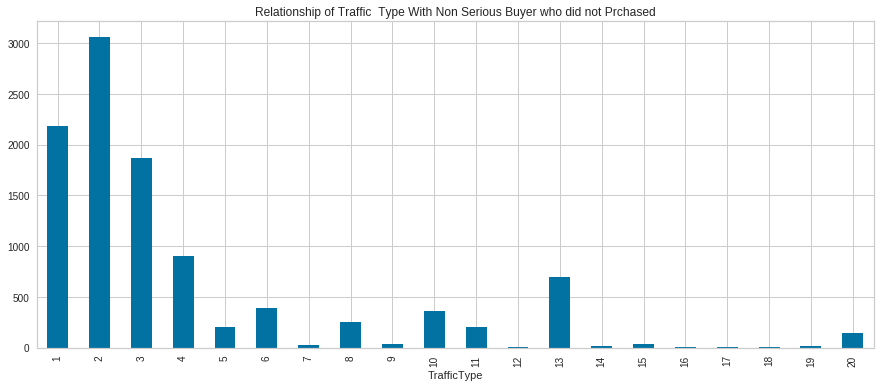

In [35]:
#Non Serious Buyer who did not Prchased relation with Traffic Type


FRevenue.groupby("TrafficType")["Revenue"].count().plot('bar',figsize=(15,6))
plt.title("Relationship of Traffic  Type With Non Serious Buyer who did not Prchased")

In [36]:
sp=TRevenue.groupby(["Region","VisitorType"])["Revenue"].count()
sp=pd.DataFrame(sp)
sp=sp.reset_index()
sp.columns=["Region","VisitorType","Revenue"]
sp

Region        VisitorType  Revenue
0        1        New_Visitor      165
1        1  Returning_Visitor      606
2        2        New_Visitor       42
3        2              Other        1
4        2  Returning_Visitor      145
5        3        New_Visitor       62
6        3  Returning_Visitor      287
7        4        New_Visitor       36
8        4  Returning_Visitor      139
9        5        New_Visitor       22
10       5  Returning_Visitor       30
11       6        New_Visitor       32
12       6  Returning_Visitor       80
13       7        New_Visitor       23
14       7  Returning_Visitor       96
15       8        New_Visitor       13
16       8  Returning_Visitor       43
17       9        New_Visitor       27
18       9              Other       15
19       9  Returning_Visitor       44

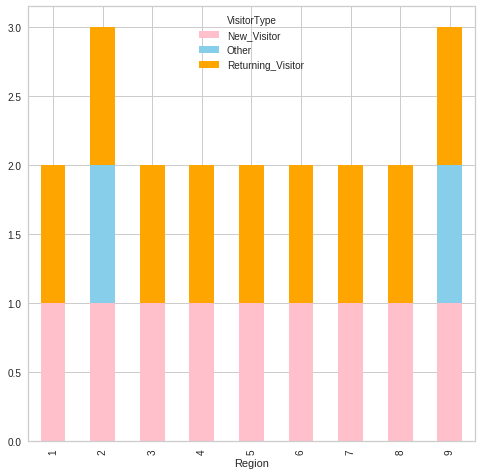

In [37]:
tab = pd.crosstab(sp["Region"],sp["VisitorType"])
tab.plot(kind ='bar',figsize=(8,8),stacked=True,color = ['pink', 'skyblue','orange'])

This are the visitor who come from different region on web site and generate Revnue

Above graph represent that from Region 2 and region 9 all visitors generate Revenue

From Region 1,3,4,5,6,7,8 only New Visitor and returning visitor generate revenue mean they do shop from website  

In [38]:
sp=FRevenue.groupby(["Region","VisitorType"])["Revenue"].count()
sp=pd.DataFrame(sp)
sp=sp.reset_index()
sp.columns=["Region","VisitorType","Revenue"]
sp

Region        VisitorType  Revenue
0        1        New_Visitor      492
1        1              Other        8
2        1  Returning_Visitor     3503
3        2        New_Visitor      107
4        2              Other        4
5        2  Returning_Visitor      835
6        3        New_Visitor      250
7        3              Other        8
8        3  Returning_Visitor     1795
9        4        New_Visitor      103
10       4              Other        5
11       4  Returning_Visitor      896
12       5        New_Visitor       28
13       5  Returning_Visitor      237
14       6        New_Visitor       89
15       6              Other        1
16       6  Returning_Visitor      602
17       7        New_Visitor       77
18       7              Other        2
19       7  Returning_Visitor      563
20       8        New_Visitor       61
21       8              Other        1
22       8  Returning_Visitor      316
23       9        New_Visitor       65
24       9              Other       40
25       9  Returning_Visitor      320

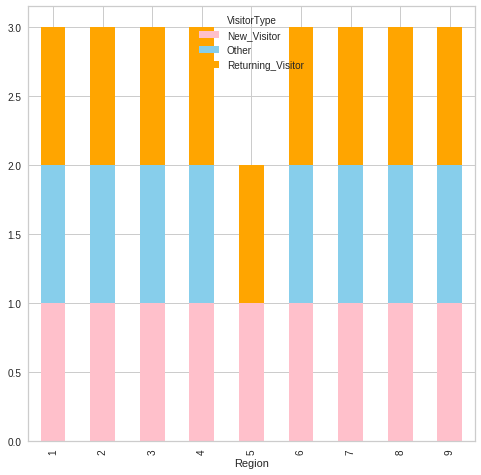

In [39]:
tab = pd.crosstab(sp["Region"],sp["VisitorType"])
tab.plot(kind ='bar',figsize=(8,8),stacked=True,color = ['pink', 'skyblue','orange'])

This are the visitor who come from different region on web site and generate False Revnue

Above graph represent that from Region 4 Returning Visiotr and New Visitor are the person who generate False Revenue 



In [40]:
sp=TRevenue.groupby(["TrafficType","VisitorType"])["Revenue"].count()
sp=pd.DataFrame(sp)
sp=sp.reset_index()
sp.columns=["TrafficType","VisitorType","Revenue"]
sp

TrafficType        VisitorType  Revenue
0             1        New_Visitor        7
1             1  Returning_Visitor      255
2             2        New_Visitor      238
3             2              Other        1
4             2  Returning_Visitor      608
5             3        New_Visitor       25
6             3              Other        1
7             3  Returning_Visitor      154
8             4        New_Visitor       33
9             4  Returning_Visitor      132
10            5        New_Visitor       39
11            5  Returning_Visitor       17
12            6        New_Visitor       11
13            6  Returning_Visitor       42
14            7        New_Visitor        1
15            7  Returning_Visitor       11
16            8        New_Visitor       50
17            8  Returning_Visitor       45
18            9  Returning_Visitor        4
19           10        New_Visitor        5
20           10  Returning_Visitor       85
21           11        New_Visitor        6
22           11  Returning_Visitor       41
23           13  Returning_Visitor       43
24           14  Returning_Visitor        2
25           16  Returning_Visitor        1
26           19  Returning_Visitor        1
27           20        New_Visitor        7
28           20              Other       14
29           20  Returning_Visitor       29

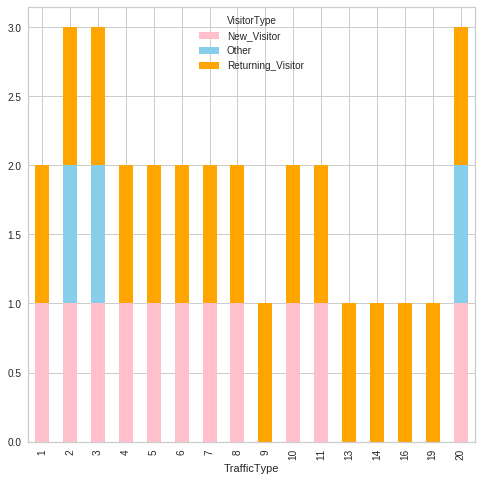

In [41]:
tab = pd.crosstab(sp["TrafficType"],sp["VisitorType"])
tab.plot(kind ='bar',figsize=(8,8),stacked=True,color = ['pink', 'skyblue','orange'])

The Visitor coming from Traffic type 2,3 and 20 generate more revenue then other and they all generate True Revenue.

All Three Type of Visitor coming from Traffic type 2,3 and 20.

From Traffic Type 9,13,14,16,19 only Returning visitor is generating Revenue.

From Traffic Type 1,4,5,6,7,8,10,11  only Returning and New Visitor are generating Revenue.

In [42]:
sp=FRevenue.groupby(["TrafficType","VisitorType"])["Revenue"].count()
sp=pd.DataFrame(sp)
sp=sp.reset_index()
sp.columns=["TrafficType","VisitorType","Revenue"]
sp

TrafficType        VisitorType  Revenue
0             1        New_Visitor       30
1             1              Other        7
2             1  Returning_Visitor     2145
3             2        New_Visitor      698
4             2              Other       10
5             2  Returning_Visitor     2354
6             3        New_Visitor      115
7             3              Other        6
8             3  Returning_Visitor     1750
9             4        New_Visitor       66
10            4  Returning_Visitor      838
11            5        New_Visitor      110
12            5              Other        1
13            5  Returning_Visitor       93
14            6        New_Visitor       31
15            6              Other        1
16            6  Returning_Visitor      359
17            7        New_Visitor        4
18            7  Returning_Visitor       24
19            8        New_Visitor      125
20            8              Other        1
21            8  Returning_Visitor      122
22            9        New_Visitor        9
23            9  Returning_Visitor       29
24           10        New_Visitor       17
25           10              Other        3
26           10  Returning_Visitor      340
27           11        New_Visitor       45
28           11              Other        1
29           11  Returning_Visitor      154
30           12  Returning_Visitor        1
31           13        New_Visitor        6
32           13              Other        1
33           13  Returning_Visitor      687
34           14        New_Visitor        1
35           14  Returning_Visitor       10
36           15        New_Visitor        2
37           15  Returning_Visitor       35
38           16        New_Visitor        1
39           16  Returning_Visitor        1
40           17  Returning_Visitor        1
41           18        New_Visitor        1
42           18  Returning_Visitor        9
43           19        New_Visitor        1
44           19  Returning_Visitor       15
45           20        New_Visitor       10
46           20              Other       38
47           20  Returning_Visitor      100

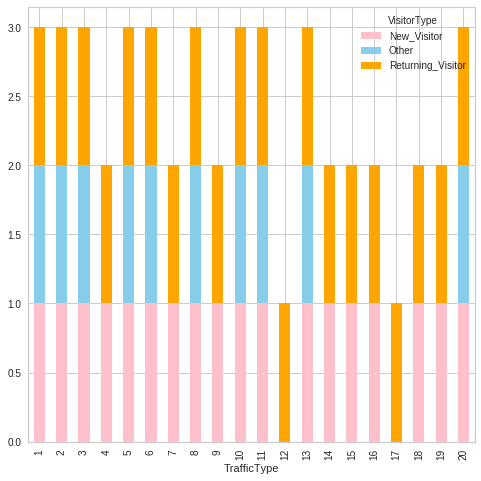

In [43]:
tab = pd.crosstab(sp["TrafficType"],sp["VisitorType"])
tab.plot(kind ='bar',figsize=(8,8),stacked=True,color = ['pink', 'skyblue','orange'])

This is graph which Represent The Traffic from which Visitor only visit website but not generate any revenue

In [44]:
sp=TRevenue.groupby(["Browser","VisitorType"])["Revenue"].count()
sp=pd.DataFrame(sp)
sp=sp.reset_index()
sp.columns=["Browser","VisitorType","Revenue"]
sp

Browser        VisitorType  Revenue
0         1        New_Visitor      101
1         1  Returning_Visitor      264
2         2        New_Visitor      235
3         2  Returning_Visitor      988
4         3        New_Visitor        1
5         3  Returning_Visitor        4
6         4        New_Visitor       48
7         4              Other        1
8         4  Returning_Visitor       81
9         5        New_Visitor       22
10        5              Other        1
11        5  Returning_Visitor       63
12        6        New_Visitor        2
13        6  Returning_Visitor       18
14        7  Returning_Visitor        6
15        8        New_Visitor        6
16        8  Returning_Visitor       15
17       10        New_Visitor        6
18       10  Returning_Visitor       26
19       11  Returning_Visitor        1
20       12  Returning_Visitor        3
21       13        New_Visitor        1
22       13              Other       14
23       13  Returning_Visitor        1

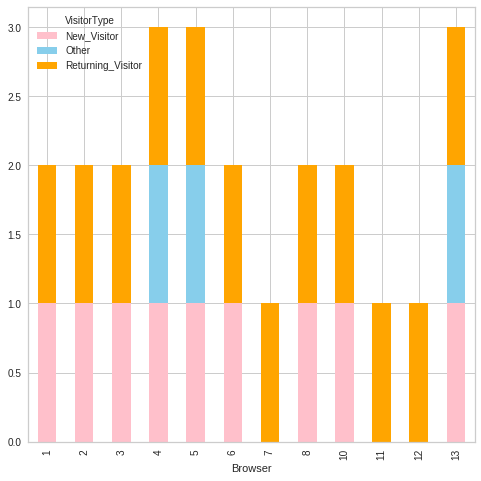

In [45]:
tab = pd.crosstab(sp["Browser"],sp["VisitorType"])
tab.plot(kind ='bar',figsize=(8,8),stacked=True,color = ['pink', 'skyblue','orange'])

All 3 Visitor use browser 4,5 and 13 for website and they generate Revenue.

where as Returning Visitor and New Visitor visit website from 1,2,6,8,10 and generate Revenue.

From Browser 7,11 and 12 only Returning Visitor visit website and generate Revenue. 

In [46]:
sp=TRevenue.groupby(["VisitorType","OperatingSystems"])["Revenue"].count()
sp=pd.DataFrame(sp)
sp=sp.reset_index()
sp.columns=["VisitorType","OperatingSystem","Revenue"]
sp

VisitorType  OperatingSystem  Revenue
0         New_Visitor                1      106
1         New_Visitor                2      256
2         New_Visitor                3       38
3         New_Visitor                4       18
4         New_Visitor                6        1
5         New_Visitor                8        3
6               Other                2        2
7               Other                8       14
8   Returning_Visitor                1      273
9   Returning_Visitor                2      897
10  Returning_Visitor                3      230
11  Returning_Visitor                4       67
12  Returning_Visitor                5        1
13  Returning_Visitor                6        1
14  Returning_Visitor                7        1

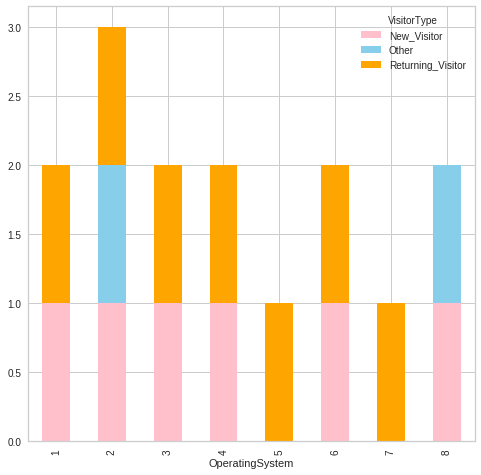

In [47]:
tab = pd.crosstab(sp["OperatingSystem"],sp["VisitorType"])
tab.plot(kind ='bar',figsize=(8,8),stacked=True,color = ['pink', 'skyblue','orange'])

From operating System 2 their is all three type of visitor who generate Revenue and are greater then other.

From OS 1,3,4 and 6 only New Visitor and Returning Visitor visit website and generate revenue.

From 5 and 7 only Returning Visitor visit website and Generate Revenue.

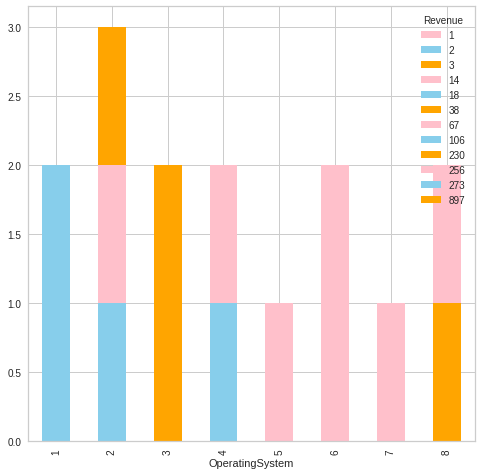

In [48]:
tab = pd.crosstab(sp["OperatingSystem"],sp["Revenue"])
tab.plot(kind ='bar',figsize=(8,8),stacked=True,color = ['pink', 'skyblue','orange'])

From Operating System 2 highest Revenue is Generated.

In [49]:
sp=TRevenue.groupby(["SpecialDay","VisitorType"])["Revenue"].count()
sp=pd.DataFrame(sp)
sp=sp.reset_index()
sp.columns=["SpecialDay","VisitorType","Revenue"]
sp.head()

SpecialDay        VisitorType  Revenue
0         0.0        New_Visitor      406
1         0.0              Other       16
2         0.0  Returning_Visitor     1409
3         0.2        New_Visitor        5
4         0.2  Returning_Visitor        9

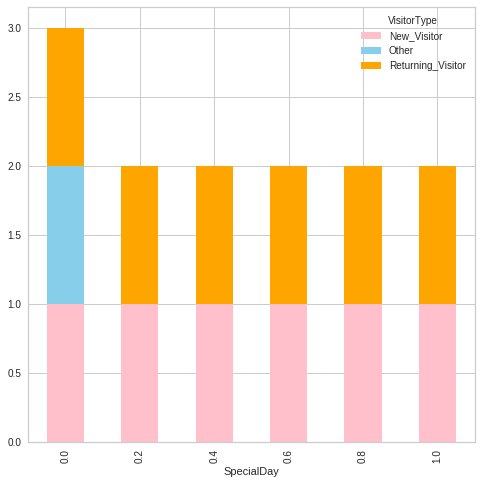

In [50]:
tab = pd.crosstab(sp["SpecialDay"],sp["VisitorType"])
tab.plot(kind ='bar',figsize=(8,8),stacked=True,color = ['pink', 'skyblue','orange'])

This graph represent that on special day 0.0 all three Type of Visitor visit website and generate the Revenue.

from Specail day 0.2 to 1.0 only New Visitor and returning visitor visit the web and generate Revenue.

In [51]:
sp=TRevenue.groupby(["Weekend","VisitorType"])["Revenue"].count()
sp=pd.DataFrame(sp)
sp=sp.reset_index()
sp.columns=["Weekend","VisitorType","Revenue"]
sp.head()

Weekend        VisitorType  Revenue
0    False        New_Visitor      317
1    False              Other       15
2    False  Returning_Visitor     1077
3     True        New_Visitor      105
4     True              Other        1

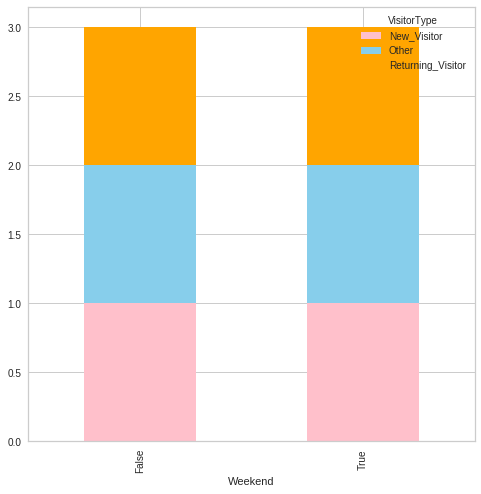

In [52]:
tab = pd.crosstab(sp["Weekend"],sp["VisitorType"])
tab.plot(kind ='bar',figsize=(8,8),stacked=True,color = ['pink', 'skyblue','orange'])

This graph represent that in both case when their was weekend or not all 3 visitor did purchased on both. 

### **Analyze Visitor Types with Pages Durations**

In [53]:
#IF visitor did purchased then find the average duration in eash page the visitor visit ??

sp=TRevenue.groupby(["VisitorType"])["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration"].mean().round(2)
sp=pd.DataFrame(sp)
sp=sp.reset_index()
sp.columns=["VisitorType","Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration"]
sp.head()


VisitorType  Administrative  Administrative_Duration  Informational  \
0        New_Visitor            2.20                    80.75           0.28   
1              Other            2.44                   108.16           0.25   
2  Returning_Visitor            3.75                   130.73           0.94   

   Informational_Duration  ProductRelated  ProductRelated_Duration  
0                   19.76           22.29                   874.22  
1                   26.28           24.50                  1258.39  
2                   68.82           55.91                  2170.58

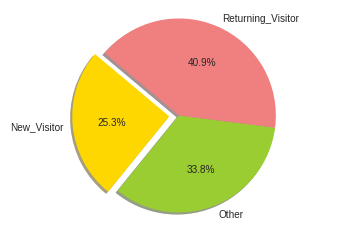

In [54]:
#For Administrative Page

colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sp["Administrative_Duration"], explode=explode, labels=sp["VisitorType"], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

This graph represent the percentage of visitors spend time on Administrative Page.


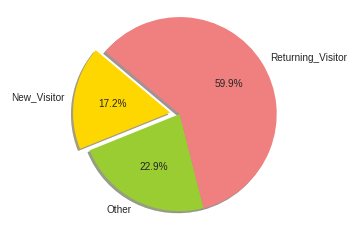

In [55]:

#For informational Page
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sp["Informational_Duration"], explode=explode, labels=sp["VisitorType"], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

This graph represent the percentage of visitors spend time on Informational Page.


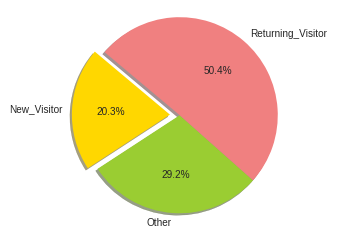

In [56]:
#For Product Page

colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sp["ProductRelated_Duration"], explode=explode, labels=sp["VisitorType"], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

This graph represent the percentage of visitors spend time on Product Page.


### **Analyze Visitor Types with Metrics**

In [57]:
#IF visitor did purchased then find the average metrics  the visitor visit ??

sp=TRevenue.groupby(["VisitorType"])["BounceRates","ExitRates","PageValues"].mean().round(2)
sp=pd.DataFrame(sp)
sp=sp.reset_index()
sp.columns=["VisitorType","BounceRates","ExitRates","PageValues"]
sp.head()


VisitorType  BounceRates  ExitRates  PageValues
0        New_Visitor         0.00       0.01       39.12
1              Other         0.00       0.01       90.33
2  Returning_Visitor         0.01       0.02       23.17

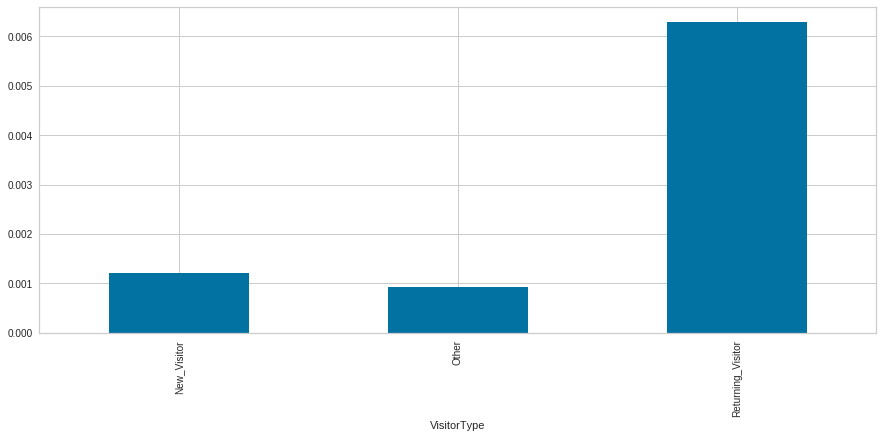

In [58]:
TRevenue.groupby("VisitorType")["BounceRates"].mean().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))

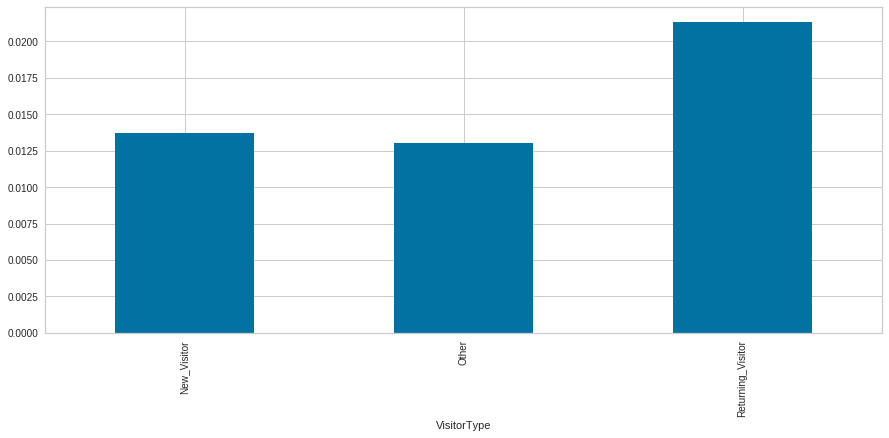

In [59]:
TRevenue.groupby("VisitorType")["ExitRates"].mean().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))

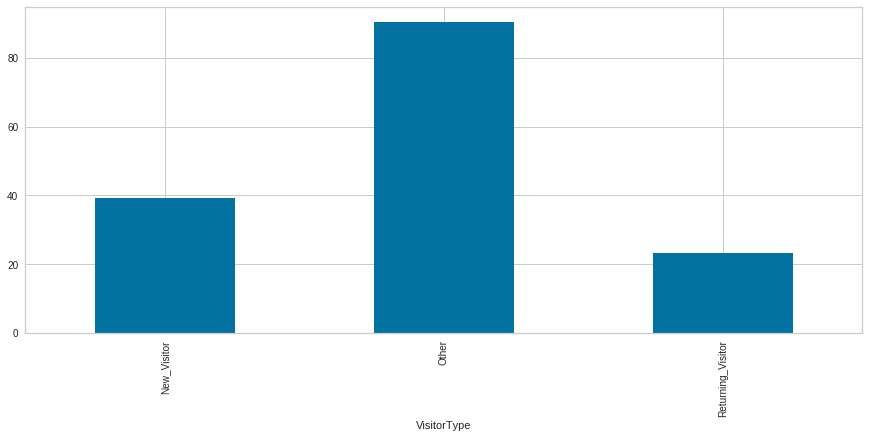

In [60]:
TRevenue.groupby("VisitorType")["PageValues"].mean().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))

In [61]:
OSIData.groupby("Revenue").agg(["sum",'max','min','mean']).round(2)

Administrative                  Administrative_Duration                \
                   sum   max  min  mean                     sum      max  min   
Revenue                                                                         
False          22071.0  27.0  0.0  2.12               768499.44  3398.75  0.0   
True            6475.0  26.0  0.0  3.39               227974.03  2086.75  0.0   

                Informational        ... Region       TrafficType          \
           mean           sum   max  ...    min  mean         sum max min   
Revenue                              ...                                    
False     73.84        4707.0  24.0  ...      1  3.16       42459  20   1   
True     119.48        1500.0  12.0  ...      1  3.08        7673  20   1   

              Weekend                     
         mean     sum   max    min  mean  
Revenue                                   
False    4.08  2366.0  True  False  0.23  
True     4.02   499.0  True  False  0.26  

[2 rows x 60 columns]

In [62]:
OSIData.groupby(["SpecialDay","Revenue","Weekend"])["Administrative","Administrative_Duration","Informational","ProductRelated","ProductRelated_Duration"].mean().round(2)

Administrative  Administrative_Duration  \
SpecialDay Revenue Weekend                                            
0.0        False   False              2.19                    76.09   
                   True               2.34                    84.16   
           True    False              3.48                   127.03   
                   True               3.37                   107.78   
0.2        False   False              1.65                    68.66   
           True    False              3.29                    81.29   
0.4        False   False              1.30                    36.77   
           True    False              1.54                    70.86   
0.6        False   False              1.18                    38.78   
           True    False              2.24                    68.77   
0.8        False   False              1.06                    31.40   
                   True               0.17                     0.00   
           True    False              0.82                    43.08   
1.0        False   True               1.62                    42.53   
           True    True               2.00                    27.15   

                            Informational  ProductRelated  \
SpecialDay Revenue Weekend                                  
0.0        False   False             0.44           28.55   
                   True              0.57           30.30   
           True    False             0.80           50.13   
                   True              0.76           45.36   
0.2        False   False             0.29           23.79   
           True    False             0.93           36.36   
0.4        False   False             0.39           27.26   
           True    False             0.46           32.85   
0.6        False   False             0.26           23.61   
           True    False             0.76           35.07   
0.8        False   False             0.24           28.40   
                   True              0.00            8.50   
           True    False             0.55           32.36   
1.0        False   True              0.36           35.69   
           True    True              0.30           22.60   

                            ProductRelated_Duration  
SpecialDay Revenue Weekend                           
0.0        False   False                    1080.28  
                   True                     1117.63  
           True    False                    1961.22  
                   True                     1734.50  
0.2        False   False                     896.65  
           True    False                    1451.93  
0.4        False   False                    1012.96  
           True    False                    1267.88  
0.6        False   False                     725.71  
           True    False                    1248.84  
0.8        False   False                    1019.91  
                   True                      255.08  
           True    False                    1534.96  
1.0        False   True                     1133.07  
           True    True                      976.44

In [63]:
OSIData.groupby(["SpecialDay","Revenue","Weekend"])["Administrative","Administrative_Duration","Informational","ProductRelated","ProductRelated_Duration"].count().round(2)

Administrative  Administrative_Duration  \
SpecialDay Revenue Weekend                                            
0.0        False   False              7018                     7018   
                   True               2216                     2216   
           True    False              1342                     1342   
                   True                489                      489   
0.2        False   False               164                      164   
           True    False                14                       14   
0.4        False   False               230                      230   
           True    False                13                       13   
0.6        False   False               322                      322   
           True    False                29                       29   
0.8        False   False               308                      308   
                   True                  6                        6   
           True    False                11                       11   
1.0        False   True                144                      144   
           True    True                 10                       10   

                            Informational  ProductRelated  \
SpecialDay Revenue Weekend                                  
0.0        False   False             7018            7018   
                   True              2216            2216   
           True    False             1342            1342   
                   True               489             489   
0.2        False   False              164             164   
           True    False               14              14   
0.4        False   False              230             230   
           True    False               13              13   
0.6        False   False              322             322   
           True    False               29              29   
0.8        False   False              308             308   
                   True                 6               6   
           True    False               11              11   
1.0        False   True               144             144   
           True    True                10              10   

                            ProductRelated_Duration  
SpecialDay Revenue Weekend                           
0.0        False   False                       7018  
                   True                        2216  
           True    False                       1342  
                   True                         489  
0.2        False   False                        164  
           True    False                         14  
0.4        False   False                        230  
           True    False                         13  
0.6        False   False                        322  
           True    False                         29  
0.8        False   False                        308  
                   True                           6  
           True    False                         11  
1.0        False   True                         144  
           True    True                          10

In [64]:
sp=OSIData.groupby(["SpecialDay","Revenue","Weekend"])["BounceRates","ExitRates","PageValues"].sum().round(2)
sp.sort_values(by = "BounceRates", ascending = False)

BounceRates  ExitRates  PageValues
SpecialDay Revenue Weekend                                    
0.0        False   False         176.06     330.35    15210.87
                   True           45.07      89.71     4317.13
0.6        False   False          12.62      20.92      290.75
0.8        False   False          10.81      19.27      202.03
0.4        False   False           8.66      14.38      256.26
0.0        True    False           7.16      26.66    36728.61
0.2        False   False           5.37       9.31      222.25
1.0        False   True            4.07       7.89       94.55
0.0        True    True            2.08       9.01    13450.37
0.8        False   True            0.41       0.49        0.00
0.6        True    False           0.23       0.59      710.94
0.4        True    False           0.11       0.34      297.12
0.8        True    False           0.10       0.25      209.81
0.2        True    False           0.05       0.25      434.66
1.0        True    True            0.03       0.21      189.20

### **Analyze Relationship Of Special Day with metrices**

In [65]:
OSIData.groupby(["SpecialDay"])["BounceRates","ExitRates","PageValues"].mean()

BounceRates  ExitRates  PageValues
SpecialDay                                    
0.0            0.020820   0.041186    6.299772
0.2            0.030450   0.053725    3.690468
0.4            0.036090   0.060567    2.277304
0.6            0.036613   0.061275    2.853831
0.8            0.034818   0.061549    1.267192
1.0            0.026608   0.052607    1.842522

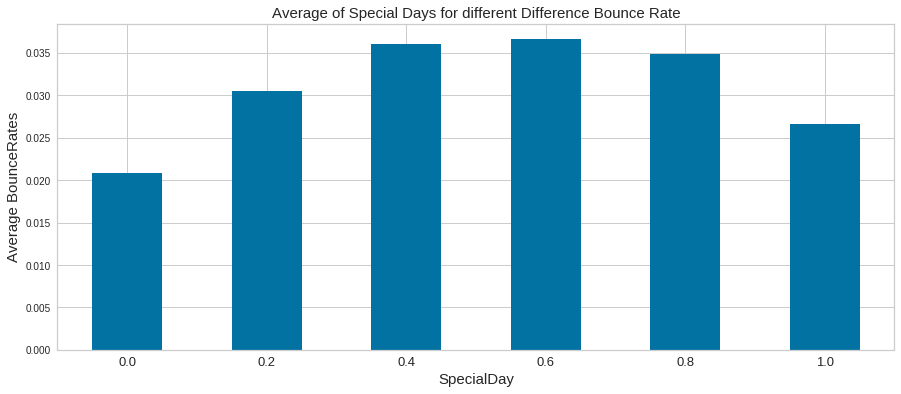

In [66]:
ax=OSIData.groupby(["SpecialDay"])["BounceRates"].mean().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('SpecialDay',fontsize=15)
ax.set_ylabel('Average BounceRates',fontsize=15)
ax.set_title('Average of Special Days for different Difference Bounce Rate',fontsize=15)
ax.set_xticklabels(('0.0','0.2','0.4','0.6','0.8','1.0'), rotation='horizontal', fontsize=13)
plt.show()

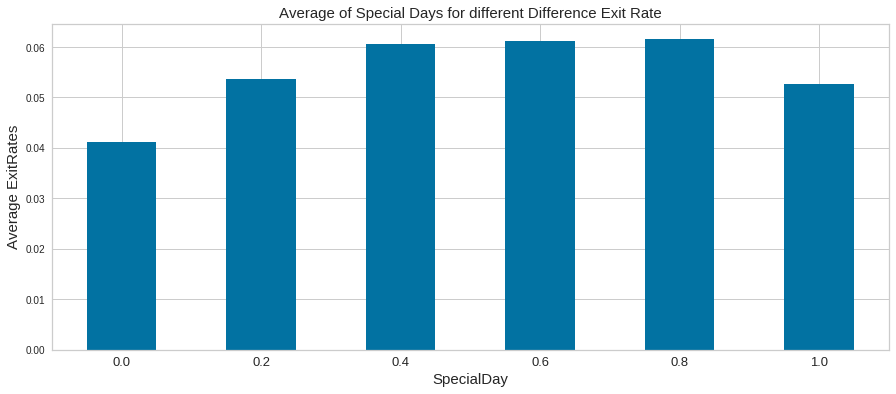

In [67]:
ax=OSIData.groupby(["SpecialDay"])["ExitRates"].mean().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('SpecialDay',fontsize=15)
ax.set_ylabel('Average ExitRates',fontsize=15)
ax.set_title('Average of Special Days for different Difference Exit Rate',fontsize=15)
ax.set_xticklabels(('0.0','0.2','0.4','0.6','0.8','1.0'), rotation='horizontal', fontsize=13)
plt.show()

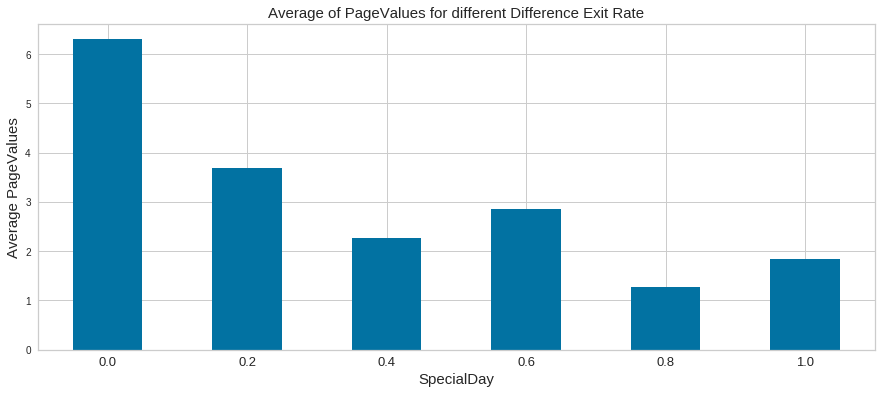

In [68]:
ax=OSIData.groupby(["SpecialDay"])["PageValues"].mean().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('SpecialDay',fontsize=15)
ax.set_ylabel('Average PageValues',fontsize=15)
ax.set_title('Average of PageValues for different Difference Exit Rate',fontsize=15)
ax.set_xticklabels(('0.0','0.2','0.4','0.6','0.8','1.0'), rotation='horizontal', fontsize=13)
plt.show()

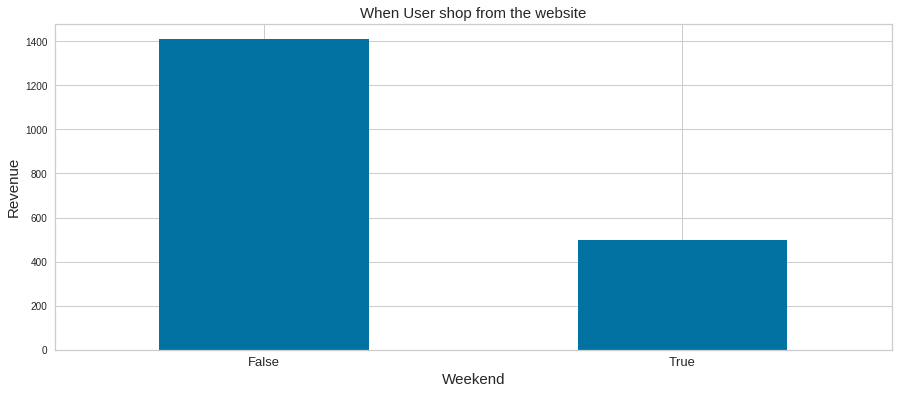

In [69]:
ax=TRevenue.groupby("Weekend")["Revenue"].count().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Weekend',fontsize=15)
ax.set_ylabel('Revenue',fontsize=15)
ax.set_title('When User shop from the website',fontsize=15)
ax.set_xticklabels(("False","True"), rotation='horizontal', fontsize=13)
plt.show()

Above result shows that user visit site and shop mostly in odd Days rather then weekend 

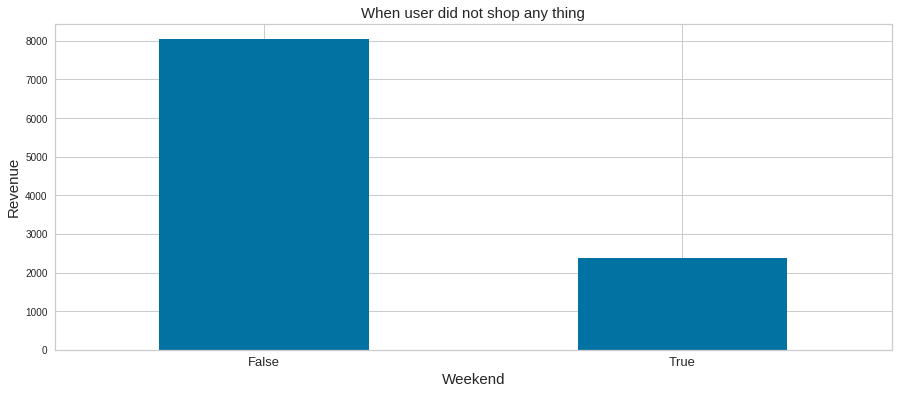

In [70]:
ax=FRevenue.groupby("Weekend")["Revenue"].count().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Weekend',fontsize=15)
ax.set_ylabel('Revenue',fontsize=15)
ax.set_title('When user did not shop any thing',fontsize=15)
ax.set_xticklabels(("False","True"), rotation='horizontal', fontsize=13)
plt.show()

This also show same for when user did not shop any thing and the day is also odd in our data set their is more example of False revenue then True so both shop and didnot shop at weekend result is same  

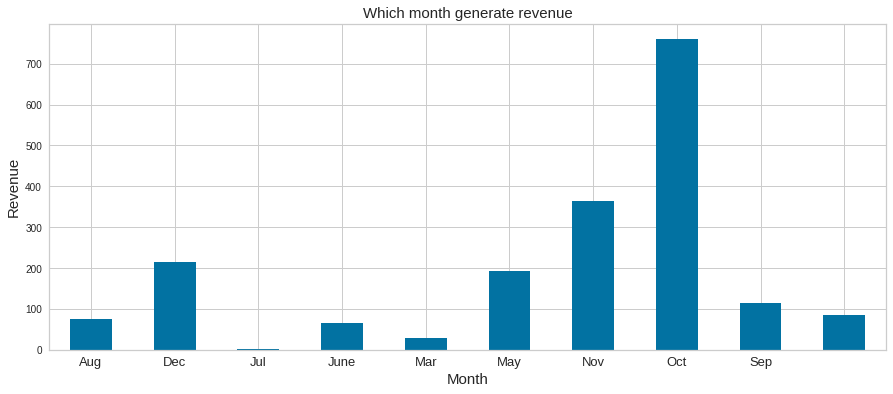

In [71]:
ax=TRevenue.groupby("Month")["Revenue"].sum().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Revenue',fontsize=15)
ax.set_title('Which month generate revenue',fontsize=15)
ax.set_xticklabels(("Aug","Dec","Jul","June","Mar","May","Nov","Oct","Sep"), rotation='horizontal', fontsize=13)
plt.show()

November,May Mar and dec contain highest Sales 

Aug,jul,june,oct and sep has very low sales 


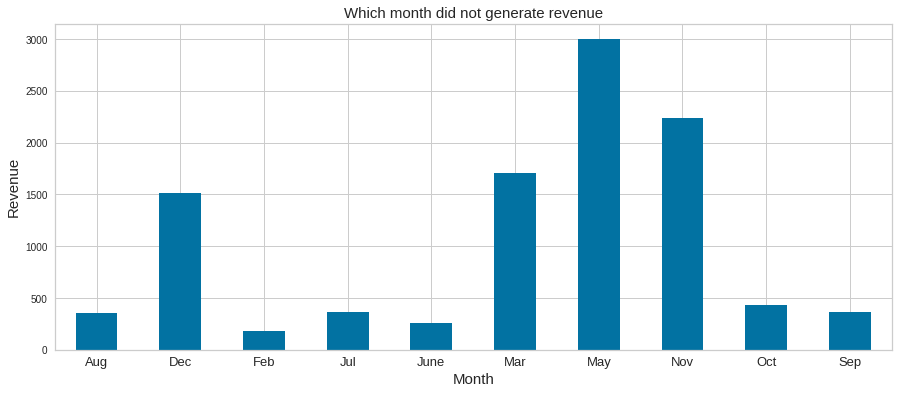

In [72]:
ax=FRevenue.groupby("Month")["Revenue"].count().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Revenue',fontsize=15)
ax.set_title('Which month did not generate revenue',fontsize=15)
ax.set_xticklabels(("Aug","Dec","Feb","Jul","June","Mar","May","Nov","Oct","Sep"), rotation='horizontal', fontsize=13)
plt.show()

May,November,December,March,Oct,Sep is the month When our Revenue is False mean reveune not generated

### **Analyzing Operating System with metrics**

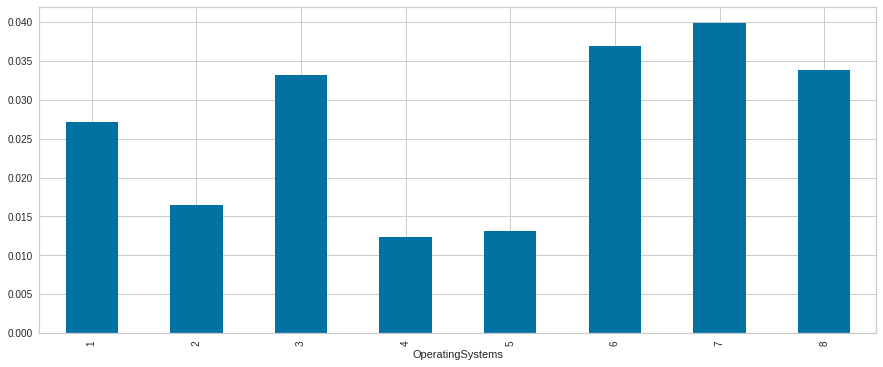

In [73]:
OSIData.groupby("OperatingSystems")["BounceRates"].mean().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))

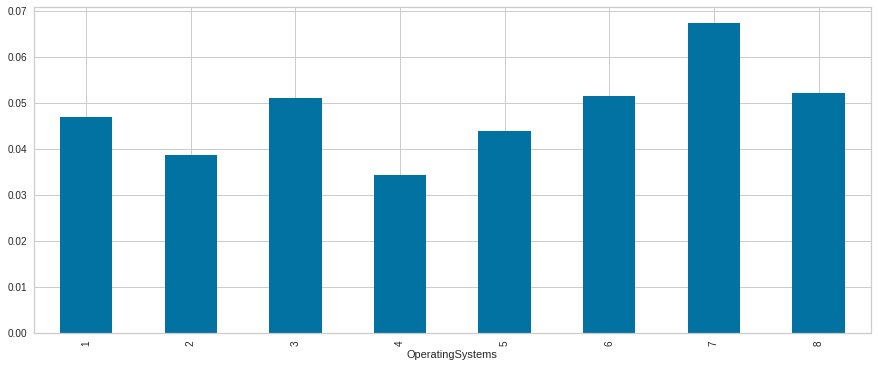

In [74]:
OSIData.groupby("OperatingSystems")["ExitRates"].mean().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))

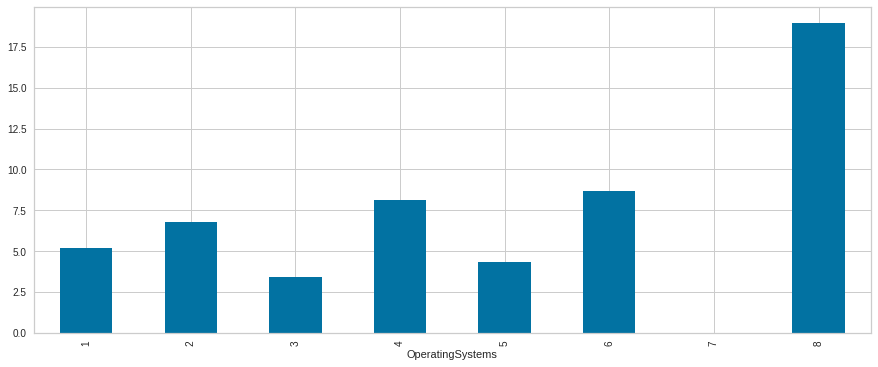

In [75]:
OSIData.groupby("OperatingSystems")["PageValues"].mean().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))

### **Analyzing Browser with metrics**

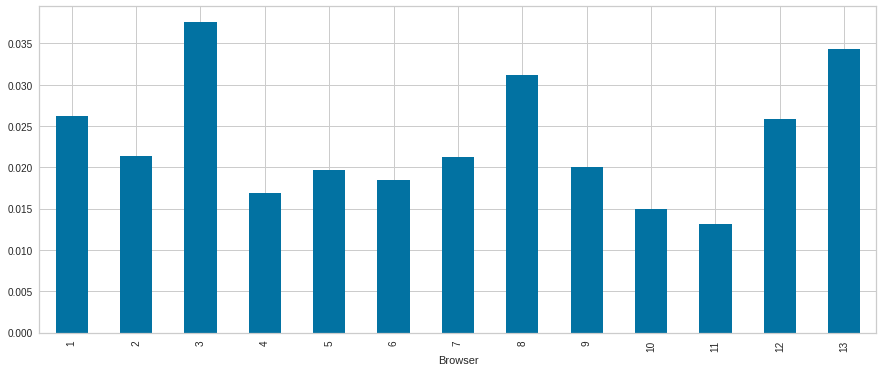

In [76]:
OSIData.groupby("Browser")["BounceRates"].mean().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))

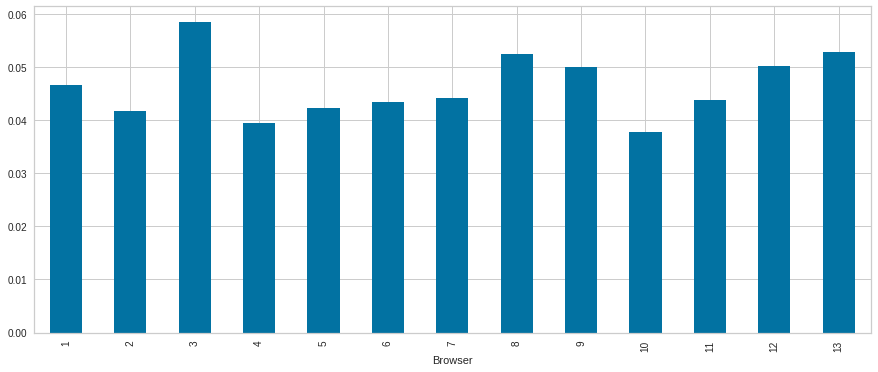

In [77]:
OSIData.groupby("Browser")["ExitRates"].mean().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))

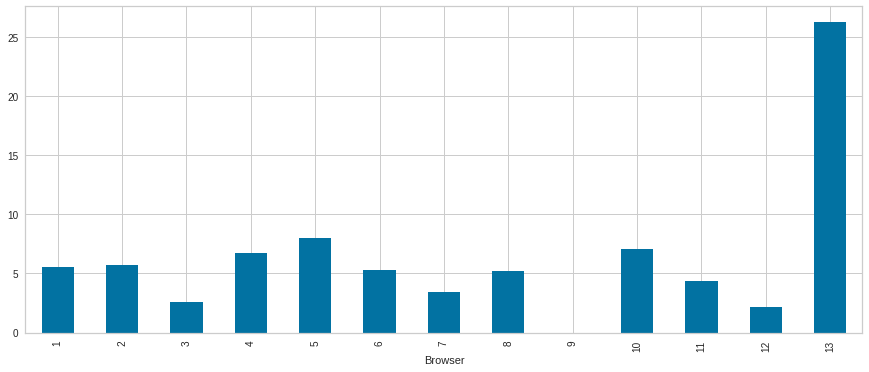

In [78]:
OSIData.groupby("Browser")["PageValues"].mean().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))

### **Analyzing Region with metrics**

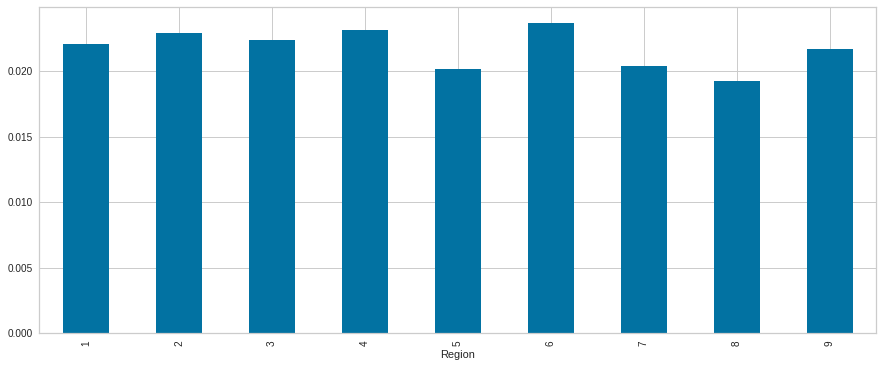

In [79]:
OSIData.groupby("Region")["BounceRates"].mean().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))

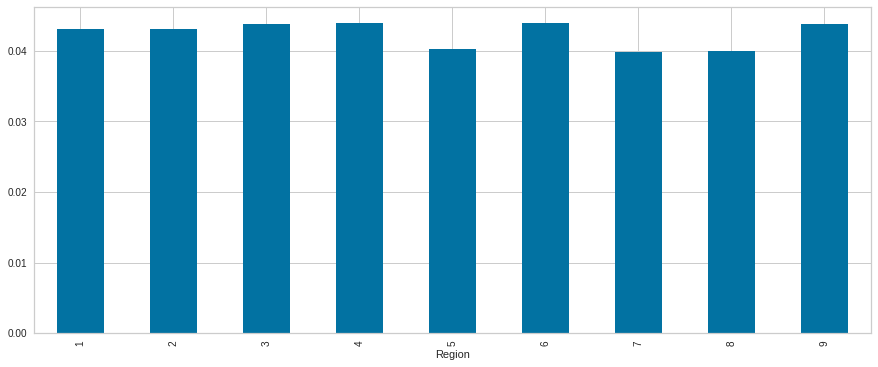

In [80]:
OSIData.groupby("Region")["ExitRates"].mean().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))

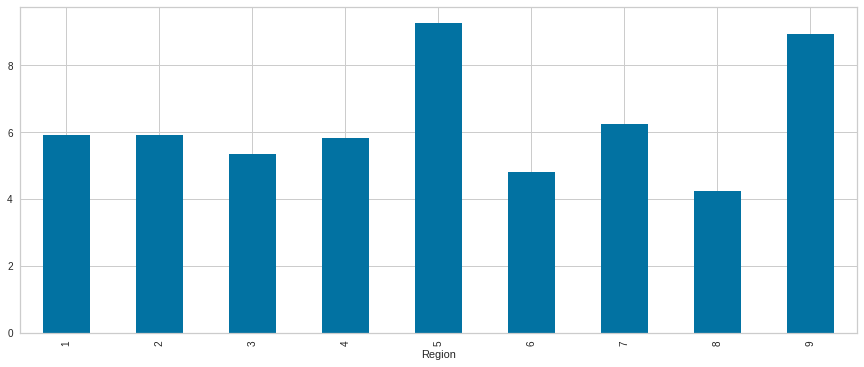

In [81]:
OSIData.groupby("Region")["PageValues"].mean().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))

### **Analyzing TrafficType in various Web Page Duration**

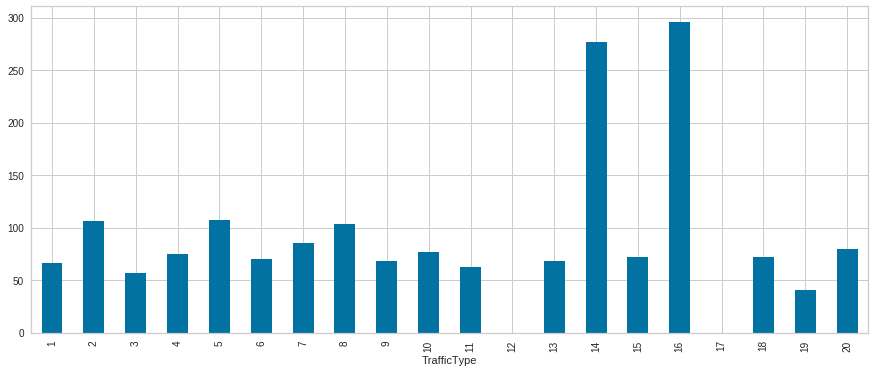

In [82]:
OSIData.groupby("TrafficType")["Administrative_Duration"].mean().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))

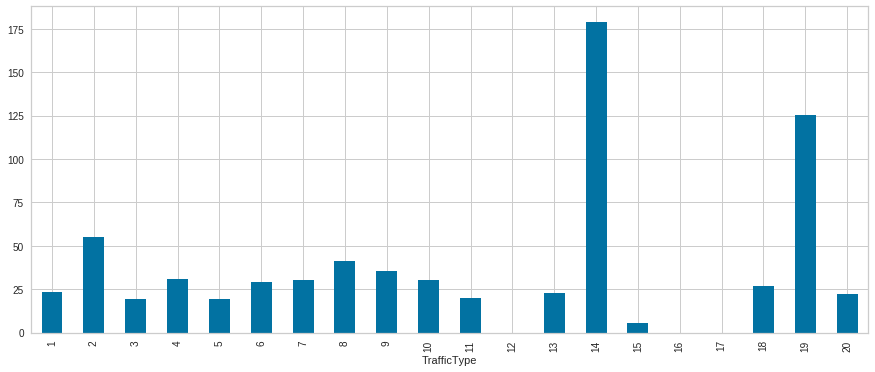

In [83]:
OSIData.groupby("TrafficType")["Informational_Duration"].mean().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))

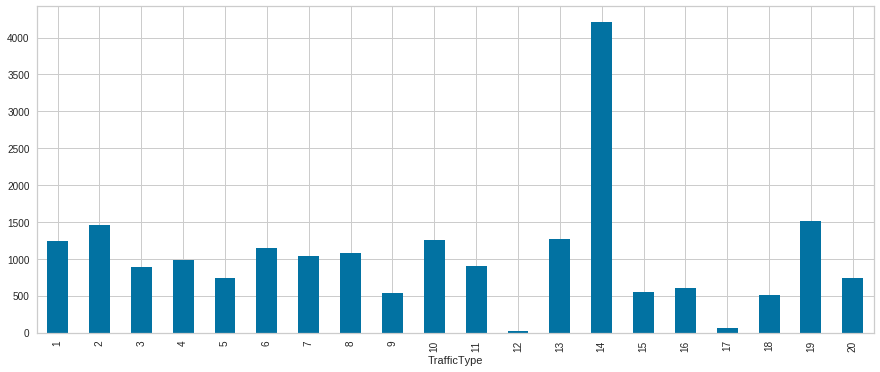

In [84]:
OSIData.groupby("TrafficType")["ProductRelated_Duration"].mean().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))

### **Analyzing Region of user in various web page**

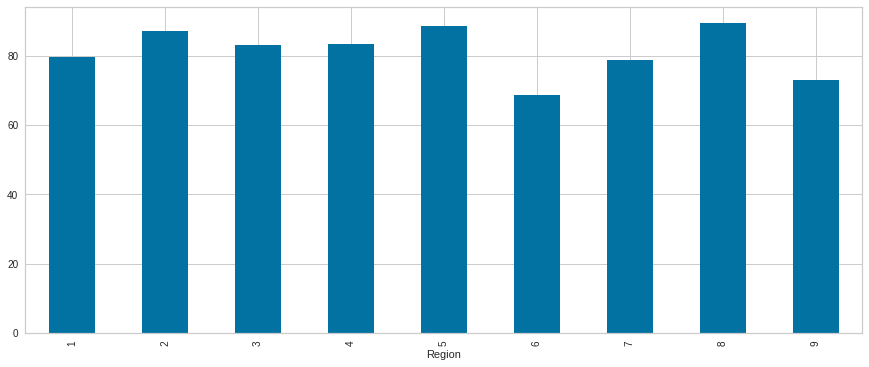

In [85]:
OSIData.groupby("Region")["Administrative_Duration"].mean().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))

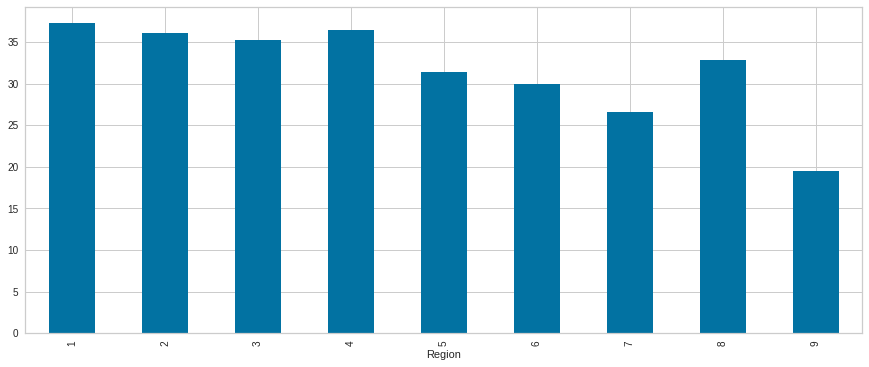

In [86]:
OSIData.groupby("Region")["Informational_Duration"].mean().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))

# Finding best Feature for Clustering

In [87]:
OSIData.head()

Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                      0.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                     0.0             1.0                 0.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [88]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
OSIData["Month"] = encoder.fit_transform(OSIData["Month"])
OSIData["VisitorType"] = encoder.fit_transform(OSIData["VisitorType"])
OSIData["Weekend"] = encoder.fit_transform(OSIData["Weekend"])
OSIData["Revenue"] = encoder.fit_transform(OSIData["Revenue"])

In [89]:
OSIData.head()

Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                      0.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                     0.0             1.0                 0.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00       0.10         0.0         0.0      2                 2   
2         0.20       0.20         0.0         0.0      2                 4   
3         0.05       0.14         0.0         0.0      2                 3   
4         0.02       0.05         0.0         0.0      2                 3   

   Browser  Region  TrafficType  VisitorType  Weekend  Revenue  
0        1       1            1            2        0        0  
1        2       1            2            2        0        0  
2        1       9            3            2        0        0  
3        2       2            4            2        0        0  
4        3       1            4            2        1        0

In [90]:
X = OSIData
y = OSIData['Revenue']
X.drop(['Revenue'],axis=1,inplace = True)
X.head()

Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                      0.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                     0.0             1.0                 0.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00       0.10         0.0         0.0      2                 2   
2         0.20       0.20         0.0         0.0      2                 4   
3         0.05       0.14         0.0         0.0      2                 3   
4         0.02       0.05         0.0         0.0      2                 3   

   Browser  Region  TrafficType  VisitorType  Weekend  
0        1       1            1            2        0  
1        2       1            2            2        0  
2        1       9            3            2        0  
3        2       2            4            2        0  
4        3       1            4            2        1

In [91]:
#Random Forest method for feature selctiion
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()    
#thit is how we get the feature importance with simple steps:
# Load classification dataset
model.fit(X, y)
# display the relative importance of each attribute
importances = np.around(model.feature_importances_,decimals=4)
print(importances)
#0.0250 is a  selected threshold looking at the importance values this can be changed to any other value too
cols_randfor_removed=[index for index,value in enumerate(importances) if value <= 0.0250]
cols_randfor_imp=[index for index,value in enumerate(importances) if value > 0.0250]
print(cols_randfor_removed)
X_randfor_sel = X.drop(X.columns[cols_randfor_removed],axis=1)
features_randfor_select=X_randfor_sel.columns
print(features_randfor_select)

[0.0337 0.0578 0.0167 0.0255 0.0741 0.0889 0.0527 0.0837 0.3981 0.0044
 0.0453 0.0165 0.0183 0.0298 0.0333 0.0114 0.0101]
[2, 9, 11, 12, 15, 16]
Index(['Administrative', 'Administrative_Duration', 'Informational_Duration',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'Month', 'Region', 'TrafficType'],
      dtype='object')


/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


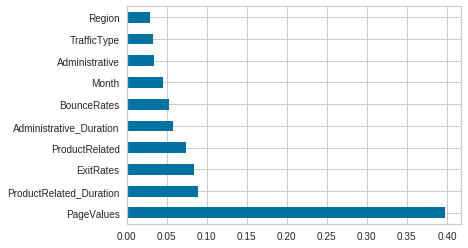

In [92]:
feat_importances = pd.Series(importances,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [93]:
# important features along with removal of correlating variables 
# selected features are
# 'Administrative_Duration','Informational_Duration','ProductRelated_Duration'
# 'ExitRates' ,'PageValues' ,'TrafficType' ,'Browser' , 'Region'
DS_2_cluster = pd.DataFrame()
DS_2_cluster['Administrative_Duration'] = OSIData['Administrative_Duration']
DS_2_cluster['Informational_Duration'] = OSIData['Informational_Duration']
DS_2_cluster['ProductRelated_Duration'] = OSIData['ProductRelated_Duration']
DS_2_cluster['ExitRates'] = OSIData['ExitRates']
DS_2_cluster['PageValues'] = OSIData['PageValues']
DS_2_cluster['TrafficType'] = OSIData['TrafficType']
DS_2_cluster['Browser'] = OSIData['Browser']
DS_2_cluster['Region'] = OSIData['Region']
DS_2_cluster.head()

Administrative_Duration  Informational_Duration  ProductRelated_Duration  \
0                      0.0                     0.0                 0.000000   
1                      0.0                     0.0                64.000000   
2                      0.0                     0.0                 0.000000   
3                      0.0                     0.0                 2.666667   
4                      0.0                     0.0               627.500000   

   ExitRates  PageValues  TrafficType  Browser  Region  
0       0.20         0.0            1        1       1  
1       0.10         0.0            2        2       1  
2       0.20         0.0            3        1       9  
3       0.14         0.0            4        2       2  
4       0.05         0.0            4        3       1

# **Analyzing Numerical Features Relations and their Distribution**

In [94]:
# function to create histogram, Q-Q plot and
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(8, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.ylabel('RM quantiles')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(data = df, x = variable)

    plt.show()




In [95]:
#finding Range of every NUmerical variable
numerical = ["Administrative_Duration","Informational_Duration","ProductRelated_Duration","ExitRates","PageValues"]
for num in numerical:
      print("Range of", num ,":",OSIData[num].max()-OSIData[num].min())

Range of Administrative_Duration : 3398.75
Range of Informational_Duration : 2549.375
Range of ProductRelated_Duration : 63973.522229999995
Range of ExitRates : 0.2
Range of PageValues : 361.76374189999996


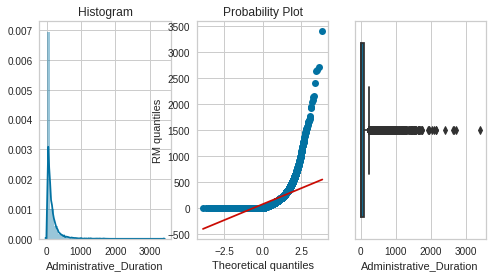

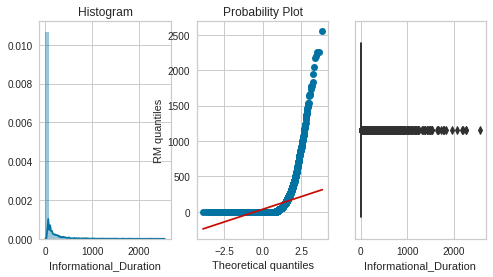

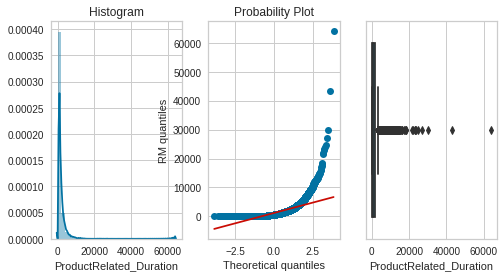

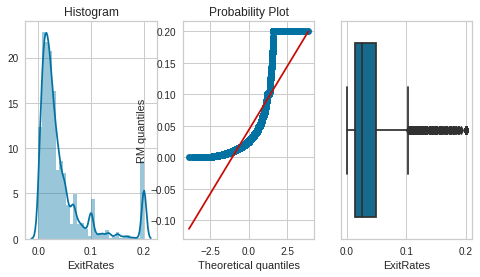

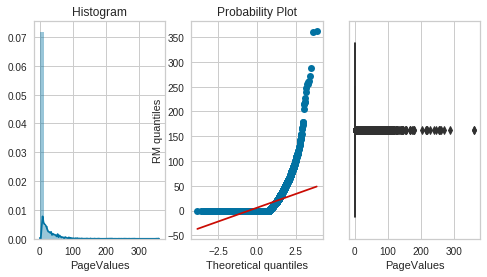

In [96]:
for num in numerical:
      diagnostic_plots(OSIData,num)

In [97]:
DS_2_cluster.shape

(12316, 8)

# Outlier Engineering and Variable Transform

In [98]:
def find_skewed_boundaries(df, variable, distance):
    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [99]:
for num in numerical:       
    upper_limit,lower_limit = find_skewed_boundaries(DS_2_cluster,num, 1.5)
    print(num," Upper limit  ",upper_limit,"Lower limit",lower_limit)

Administrative_Duration  Upper limit   233.75 Lower limit -140.25
Informational_Duration  Upper limit   0.0 Lower limit 0.0
ProductRelated_Duration  Upper limit   3388.699754375 Lower limit -1737.219852625
ExitRates  Upper limit   0.103571429 Lower limit -0.039285715000000006
PageValues  Upper limit   0.0 Lower limit 0.0


In [100]:
DS_2_cluster1 = DS_2_cluster[["Administrative_Duration","Informational_Duration","ProductRelated_Duration","ExitRates","PageValues"]]

In [101]:
DS_2_cluster_log = np.log(DS_2_cluster1+1)

In [102]:
DS_2_cluster_log.head()

Administrative_Duration  Informational_Duration  ProductRelated_Duration  \
0                      0.0                     0.0                 0.000000   
1                      0.0                     0.0                 4.174387   
2                      0.0                     0.0                 0.000000   
3                      0.0                     0.0                 1.299283   
4                      0.0                     0.0                 6.443336   

   ExitRates  PageValues  
0   0.182322         0.0  
1   0.095310         0.0  
2   0.182322         0.0  
3   0.131028         0.0  
4   0.048790         0.0

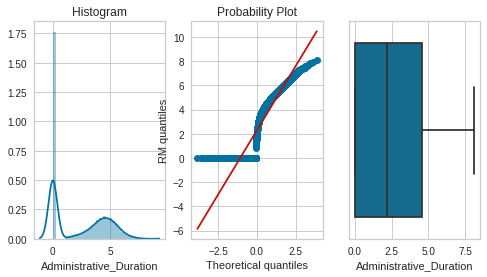

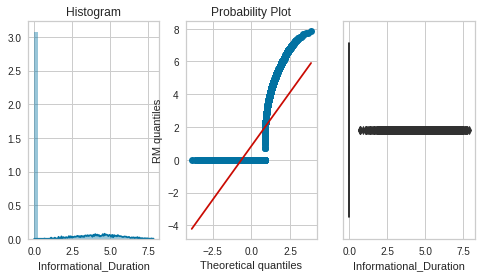

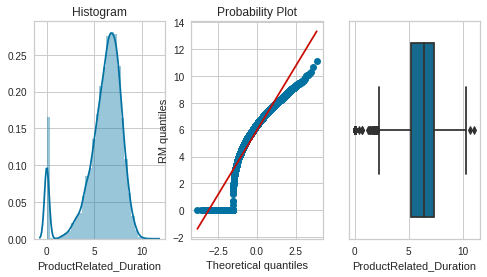

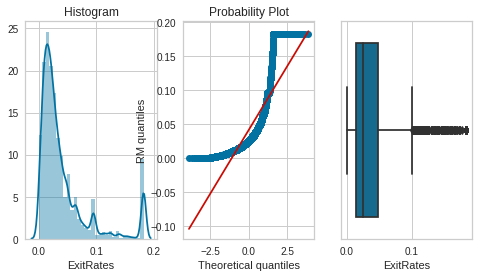

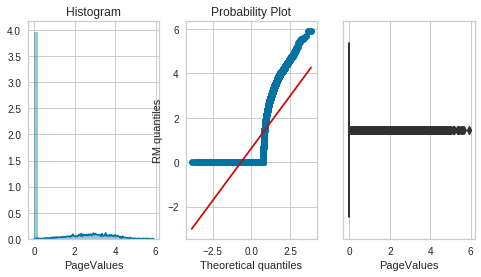

In [103]:
for num in DS_2_cluster_log.columns:
      diagnostic_plots(DS_2_cluster_log,num)

# Normalizaing Data

In [104]:
from sklearn.preprocessing import StandardScaler
DS_2_cluster_log1 =  DS_2_cluster_log[['PageValues','ProductRelated_Duration','ExitRates' ]]

scaler = StandardScaler()
cluster_scaled1 = scaler.fit_transform(DS_2_cluster_log1)

In [105]:
cluster_scaled1

array([[-0.49265052, -2.92318497,  3.17925743],
       [-0.49265052, -0.87778424,  1.2206009 ],
       [-0.49265052, -2.92318497,  3.17925743],
       ...,
       [-0.49265052, -0.36461024,  0.94608105],
       [-0.49265052, -0.05708454, -0.45588198],
       [-0.49265052, -1.40307383,  0.52792011]])

# Clustering

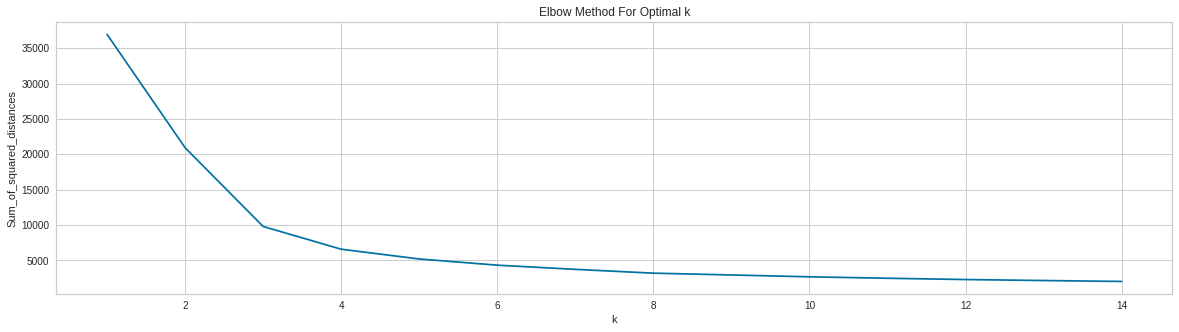

In [106]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled1)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


External Validation
0.1833464542842708
(0.34111659477055617, 0.18342921181748773, 0.23857114986249006)
K-Means
DB for K mean:0.5947518794910328


/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Silhoutte ScoreK mean:0.5826221784278636
Calinski Score for K mean:17074.41771237627


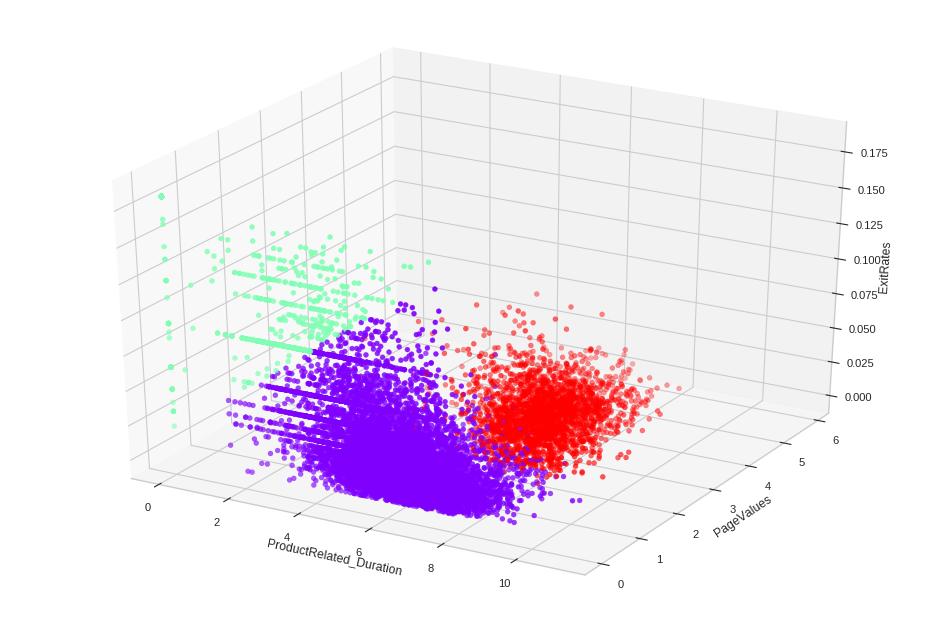

In [107]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import davies_bouldin_score 
from sklearn.metrics import calinski_harabasz_score, silhouette_score
model = KMeans(n_clusters=3)
model.fit(cluster_scaled1)
kmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")


print("External Validation")
label_givenInData = y
print(adjusted_mutual_info_score(label_givenInData, kmeans_labels))
print(metrics.homogeneity_completeness_v_measure(label_givenInData,kmeans_labels))



ax.scatter3D(DS_2_cluster_log1['ProductRelated_Duration'],DS_2_cluster_log1['PageValues'],DS_2_cluster_log1['ExitRates'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.2)
yLabel = ax.set_ylabel('PageValues', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("K-Means")

print("DB for K mean:"+str(davies_bouldin_score(cluster_scaled1, kmeans_labels)) )
print("Silhoutte ScoreK mean:"+ str(silhouette_score(cluster_scaled1, kmeans_labels))) 
print("Calinski Score for K mean:"+ str(calinski_harabasz_score(cluster_scaled1, kmeans_labels)))

In [108]:
DS2_clustered_kmeans = DS_2_cluster_log1.assign(Cluster=kmeans_labels)
grouped_kmeans = DS2_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

PageValues  ProductRelated_Duration  ExitRates
Cluster                                                
0               0.0                      6.3        0.0
1               0.0                      1.4        0.2
2               3.0                      7.2        0.0

# Mini batch K mean

DB for Mini Batch K Mean:0.6516489201143654
Silhoutte Score for Mini Batch K Mean:0.5529475965203299
Calinski Score for Mini Batch K Mean:14017.222491590075
External Validation
0.1787096761499851
(0.3415271661337496, 0.178790698624308, 0.23470991395087437)
K-Means mini batch


/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


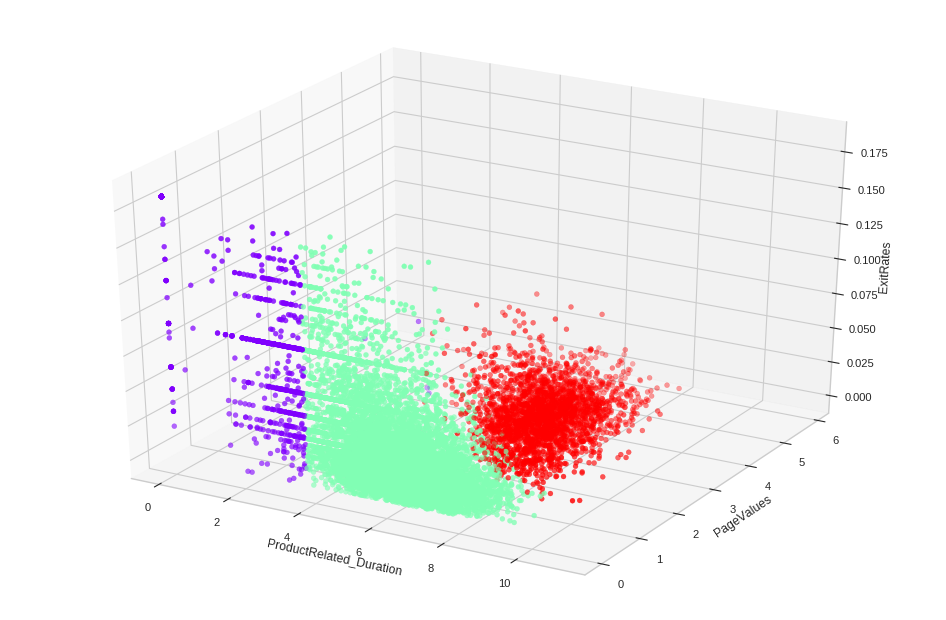

In [109]:
batch_size = [20,150,200,250,300]
from sklearn.cluster import MiniBatchKMeans, KMeans 
from sklearn.metrics.pairwise import pairwise_distances_argmin 
from sklearn.datasets.samples_generator import make_blobs 
# perform the mini batch K-means 
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 3, 
                      batch_size = batch_size[0], verbose = 0) 
  
mbk.fit(DS_2_cluster_log1) 
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0) 
mbk_means_labels = pairwise_distances_argmin(DS_2_cluster_log1, mbk_means_cluster_centers) 

print("DB for Mini Batch K Mean:"+str(davies_bouldin_score(cluster_scaled1, mbk_means_labels)) )
print("Silhoutte Score for Mini Batch K Mean:"+ str(silhouette_score(cluster_scaled1, mbk_means_labels))) 
print("Calinski Score for Mini Batch K Mean:"+ str(calinski_harabasz_score(cluster_scaled1, mbk_means_labels)))

print("External Validation")
label_givenInData = y
print(adjusted_mutual_info_score(label_givenInData, mbk_means_labels))
print(metrics.homogeneity_completeness_v_measure(label_givenInData,mbk_means_labels))


fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_cluster_log1['ProductRelated_Duration'],DS_2_cluster_log1['PageValues'],DS_2_cluster_log1['ExitRates'],c=mbk_means_labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.2)
yLabel = ax.set_ylabel('PageValues', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("K-Means mini batch")

In [110]:
DS2_clustered_MiniBatchkmeans1 = DS_2_cluster_log1.assign(Cluster=mbk_means_labels)
grouped_MiniBatchkmeans1 = DS2_clustered_MiniBatchkmeans1.groupby(['Cluster']).mean().round(1)
grouped_MiniBatchkmeans1

PageValues  ProductRelated_Duration  ExitRates
Cluster                                                
0               0.0                      1.3        0.1
1               0.0                      6.3        0.0
2               2.9                      7.2        0.0

DB for Mini Batch K Mean:0.649441500734168
Silhoutte Score for Mini Batch K Mean:0.5538500034897804
Calinski Score for Mini Batch K Mean:14034.633371895103
External Validation
0.17875002326846925
(0.34125621850919474, 0.17883112438062823, 0.23468070927774476)
K-Means mini batch


/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


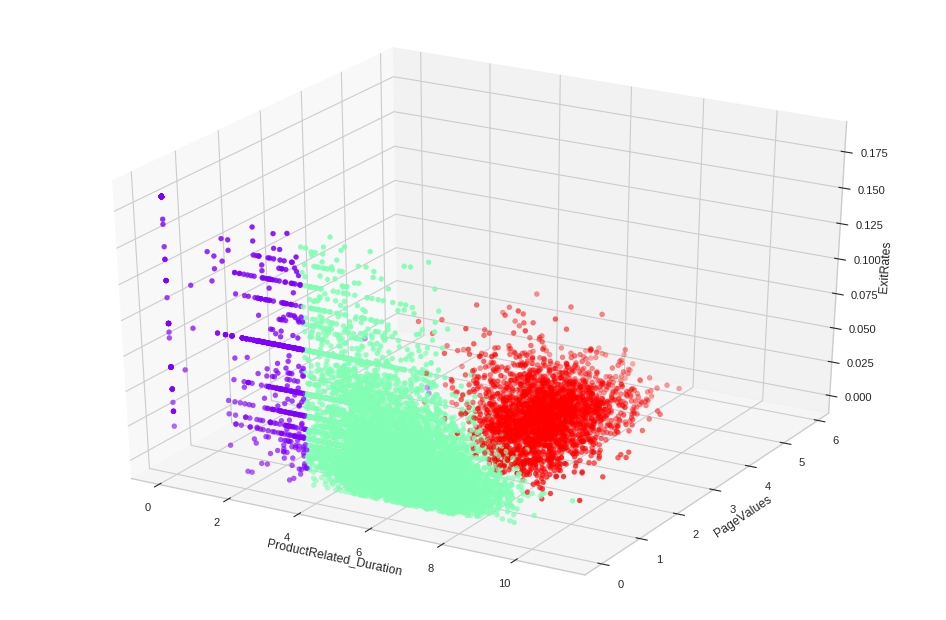

In [111]:
from sklearn.cluster import MiniBatchKMeans, KMeans 
from sklearn.metrics.pairwise import pairwise_distances_argmin 
from sklearn.datasets.samples_generator import make_blobs 
# perform the mini batch K-means 
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 3, 
                      batch_size = batch_size[1], verbose = 0) 
  
mbk.fit(DS_2_cluster_log1) 
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0) 
mbk_means_labels = pairwise_distances_argmin(DS_2_cluster_log1, mbk_means_cluster_centers) 

print("DB for Mini Batch K Mean:"+str(davies_bouldin_score(cluster_scaled1, mbk_means_labels)) )
print("Silhoutte Score for Mini Batch K Mean:"+ str(silhouette_score(cluster_scaled1, mbk_means_labels))) 
print("Calinski Score for Mini Batch K Mean:"+ str(calinski_harabasz_score(cluster_scaled1, mbk_means_labels)))

print("External Validation")
label_givenInData = y
print(adjusted_mutual_info_score(label_givenInData, mbk_means_labels))
print(metrics.homogeneity_completeness_v_measure(label_givenInData,mbk_means_labels))


fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_cluster_log1['ProductRelated_Duration'],DS_2_cluster_log1['PageValues'],DS_2_cluster_log1['ExitRates'],c=mbk_means_labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.2)
yLabel = ax.set_ylabel('PageValues', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("K-Means mini batch")

In [112]:
DS2_clustered_MiniBatchkmeans2 = DS_2_cluster_log1.assign(Cluster=mbk_means_labels)
grouped_MiniBatchkmeans2 = DS2_clustered_MiniBatchkmeans2.groupby(['Cluster']).mean().round(1)
grouped_MiniBatchkmeans2

PageValues  ProductRelated_Duration  ExitRates
Cluster                                                
0               0.0                      1.3        0.1
1               0.0                      6.3        0.0
2               3.0                      7.2        0.0

DB for Mini Batch K Mean:0.6507217963538926
Silhoutte Score for Mini Batch K Mean:0.5533683860525846
Calinski Score for Mini Batch K Mean:14024.161817206088
External Validation
0.17871398071630618
(0.3417646246023645, 0.17879494817077066, 0.23476962691074416)
K-Means mini batch


/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


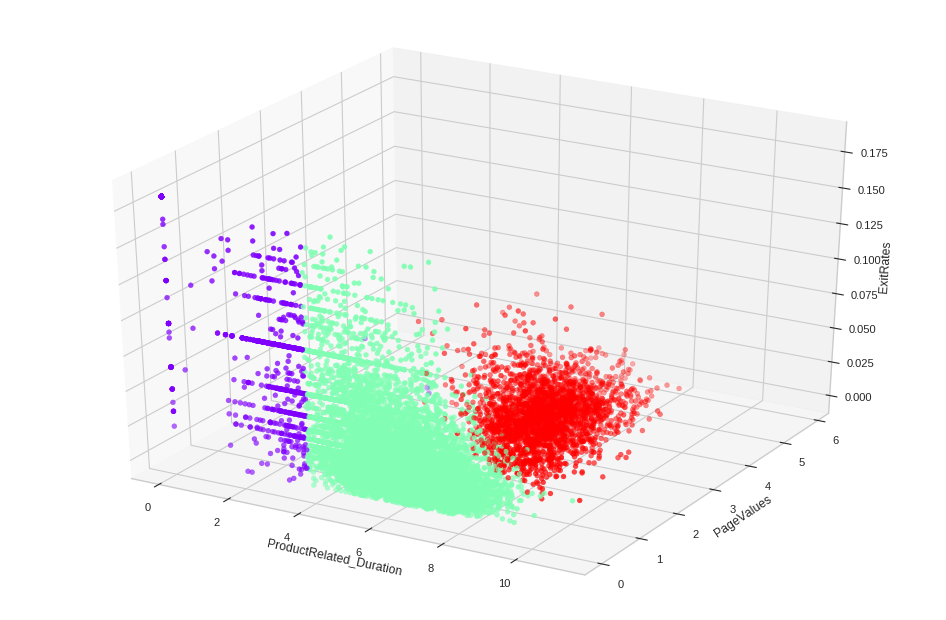

In [113]:
from sklearn.cluster import MiniBatchKMeans, KMeans 
from sklearn.metrics.pairwise import pairwise_distances_argmin 
from sklearn.datasets.samples_generator import make_blobs 
# perform the mini batch K-means 
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 3, 
                      batch_size = batch_size[2], verbose = 0) 
  
mbk.fit(DS_2_cluster_log1) 
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0) 
mbk_means_labels = pairwise_distances_argmin(DS_2_cluster_log1, mbk_means_cluster_centers) 

print("DB for Mini Batch K Mean:"+str(davies_bouldin_score(cluster_scaled1, mbk_means_labels)) )
print("Silhoutte Score for Mini Batch K Mean:"+ str(silhouette_score(cluster_scaled1, mbk_means_labels))) 
print("Calinski Score for Mini Batch K Mean:"+ str(calinski_harabasz_score(cluster_scaled1, mbk_means_labels)))

print("External Validation")
label_givenInData = y
print(adjusted_mutual_info_score(label_givenInData, mbk_means_labels))
print(metrics.homogeneity_completeness_v_measure(label_givenInData,mbk_means_labels))


fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_cluster_log1['ProductRelated_Duration'],DS_2_cluster_log1['PageValues'],DS_2_cluster_log1['ExitRates'],c=mbk_means_labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.2)
yLabel = ax.set_ylabel('PageValues', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("K-Means mini batch")

In [114]:
DS2_clustered_MiniBatchkmeans3 = DS_2_cluster_log1.assign(Cluster=mbk_means_labels)
grouped_MiniBatchkmeans3 = DS2_clustered_MiniBatchkmeans3.groupby(['Cluster']).mean().round(1)
grouped_MiniBatchkmeans3

PageValues  ProductRelated_Duration  ExitRates
Cluster                                                
0               0.0                      1.3        0.1
1               0.0                      6.3        0.0
2               3.0                      7.2        0.0

DB for mini badge K mean Model:0.7640327037983616
Silhoutte Score for mini badge K mean Model:0.5208005894145554
Calinski Score for mini badge K mean Model:12175.208287956262
External Validation
0.1586175085472289
(0.3358671796226424, 0.15869241330053777, 0.2155435827974783)
K-Means mini batch


/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


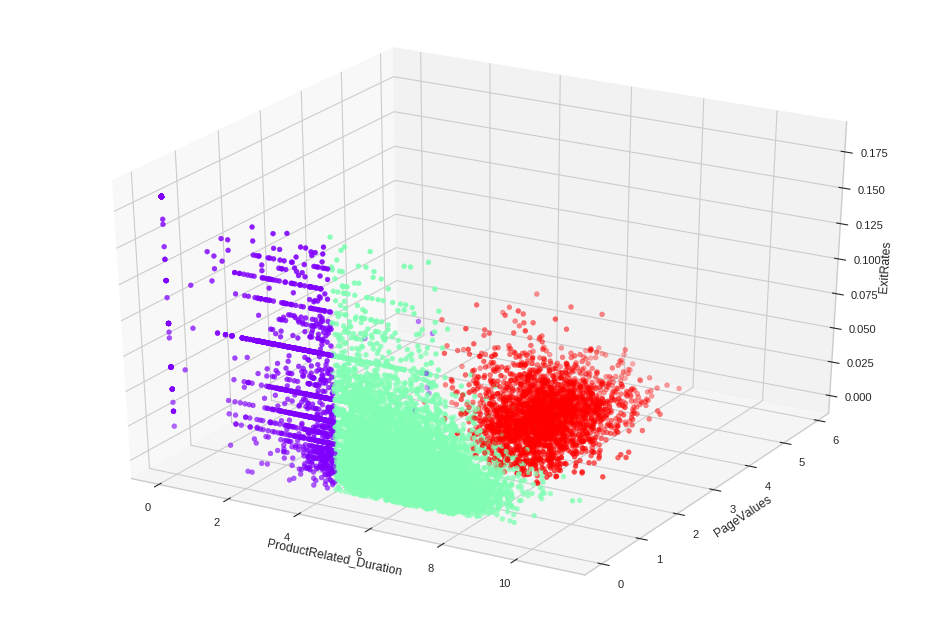

In [115]:
from sklearn.cluster import MiniBatchKMeans, KMeans 
from sklearn.metrics.pairwise import pairwise_distances_argmin 
from sklearn.datasets.samples_generator import make_blobs 
# perform the mini batch K-means 
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 3, 
                      batch_size = batch_size[3], verbose = 0) 
  
mbk.fit(DS_2_cluster_log1) 
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0) 
mbk_means_labels = pairwise_distances_argmin(DS_2_cluster_log1, mbk_means_cluster_centers) 

print("DB for mini badge K mean Model:"+str(davies_bouldin_score(cluster_scaled1, mbk_means_labels)) )
print("Silhoutte Score for mini badge K mean Model:"+ str(silhouette_score(cluster_scaled1, mbk_means_labels))) 
print("Calinski Score for mini badge K mean Model:"+ str(calinski_harabasz_score(cluster_scaled1, mbk_means_labels)))

print("External Validation")
label_givenInData = y
print(adjusted_mutual_info_score(label_givenInData, mbk_means_labels))
print(metrics.homogeneity_completeness_v_measure(label_givenInData,mbk_means_labels))

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_cluster_log1['ProductRelated_Duration'],DS_2_cluster_log1['PageValues'],DS_2_cluster_log1['ExitRates'],c=mbk_means_labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.2)
yLabel = ax.set_ylabel('PageValues', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("K-Means mini batch")

In [116]:
DS2_clustered_MiniBatchkmeans4 = DS_2_cluster_log1.assign(Cluster=mbk_means_labels)
grouped_MiniBatchkmeans4 = DS2_clustered_MiniBatchkmeans4.groupby(['Cluster']).mean().round(1)
grouped_MiniBatchkmeans4

PageValues  ProductRelated_Duration  ExitRates
Cluster                                                
0               0.0                      2.3        0.1
1               0.0                      6.5        0.0
2               3.0                      7.2        0.0

DB for mini badge K mean:0.6480674262291769
Silhoutte Score for mini badge K mean:0.554355245310456
Calinski Score for mini badge K mean:14064.651201294932
External Validation
0.17868566905806288
(0.34059508575656944, 0.17876690496102288, 0.23446894618341063)
K-Means mini batch


/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


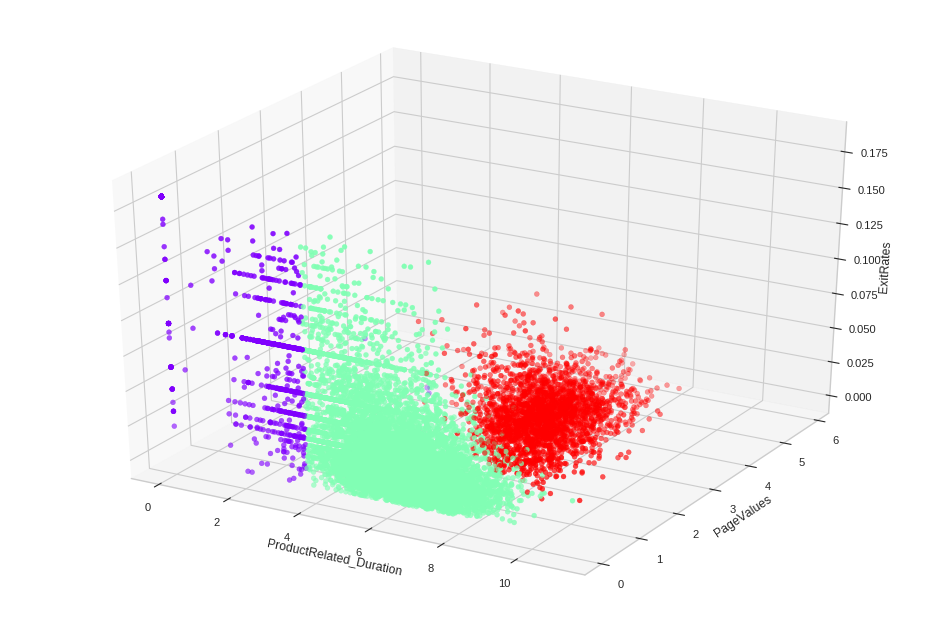

In [117]:
from sklearn.cluster import MiniBatchKMeans, KMeans 
from sklearn.metrics.pairwise import pairwise_distances_argmin 
from sklearn.datasets.samples_generator import make_blobs 
# perform the mini batch K-means 
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 3, 
                      batch_size = batch_size[4], verbose = 0) 
  
mbk.fit(DS_2_cluster_log1) 
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0) 
mbk_means_labels = pairwise_distances_argmin(DS_2_cluster_log1, mbk_means_cluster_centers) 

print("DB for mini badge K mean:"+str(davies_bouldin_score(cluster_scaled1, mbk_means_labels)) )
print("Silhoutte Score for mini badge K mean:"+ str(silhouette_score(cluster_scaled1, mbk_means_labels))) 
print("Calinski Score for mini badge K mean:"+ str(calinski_harabasz_score(cluster_scaled1, mbk_means_labels)))

print("External Validation")
label_givenInData = y
print(adjusted_mutual_info_score(label_givenInData, mbk_means_labels))
print(metrics.homogeneity_completeness_v_measure(label_givenInData,mbk_means_labels))


fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_cluster_log1['ProductRelated_Duration'],DS_2_cluster_log1['PageValues'],DS_2_cluster_log1['ExitRates'],c=mbk_means_labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.2)
yLabel = ax.set_ylabel('PageValues', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("K-Means mini batch")

In [118]:
DS2_clustered_MiniBatchkmeans5 = DS_2_cluster_log1.assign(Cluster=mbk_means_labels)
grouped_MiniBatchkmeans5 = DS2_clustered_MiniBatchkmeans5.groupby(['Cluster']).mean().round(1)
grouped_MiniBatchkmeans5

PageValues  ProductRelated_Duration  ExitRates
Cluster                                                
0               0.0                      1.3        0.1
1               0.0                      6.3        0.0
2               3.0                      7.2        0.0

# Mean Shift

In [119]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth=estimate_bandwidth(cluster_scaled1, quantile=0.3)
print("bandwidth",bandwidth)
analyzer = MeanShift(bandwidth) 
analyzer.fit(cluster_scaled1)
labels = analyzer.labels_

print("DB for Mean Shift Model:"+str(davies_bouldin_score(cluster_scaled1, labels)) )
print("Silhoutte Score for Mean Shift:"+ str(silhouette_score(cluster_scaled1, labels))) 
print("Calinski Score for Mean Shift:"+ str(calinski_harabasz_score(cluster_scaled1, labels)))


print("External Validation")
label_givenInData = y
print(adjusted_mutual_info_score(label_givenInData,labels))
print(metrics.homogeneity_completeness_v_measure(label_givenInData,labels))


fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_cluster_log['ProductRelated_Duration'],DS_2_cluster_log['PageValues'],DS_2_cluster_log['ExitRates'],c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.2)
yLabel = ax.set_ylabel('PageValues', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("Mean shift")  


labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# print the labels of each data 
print("number of estimated clusters : %d" % n_clusters_)


bandwidth 1.449682129094598
DB for Mean Shift Model:0.5671532757446031
Silhoutte Score for Mean Shift:0.5819331889016148
Calinski Score for Mean Shift:16725.79505591337
External Validation
0.19260530358256064
(0.3411453024485499, 0.19269125596436115, 0.24627656446229287)
Mean shift
number of estimated clusters : 3


/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [120]:
DS2_clustered_kmeans = DS_2_cluster_log1.assign(Cluster=labels)
grouped_means_shift = DS2_clustered_kmeans.groupby(['Cluster']).mean().round(2)
print(grouped_means_shift)

         PageValues  ProductRelated_Duration  ExitRates
Cluster                                                
0              0.03                     6.21       0.03
1              3.01                     7.16       0.02
2              0.00                     0.80       0.17


In [121]:
quantile = [0.2,0.4,0.5,0.6,1]

In [122]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth=estimate_bandwidth(cluster_scaled1, quantile=quantile[0])
print("bandwidth",bandwidth)
analyzer = MeanShift(bandwidth) 
analyzer.fit(cluster_scaled1)
labels = analyzer.labels_

print("DB for Mean Shift:"+str(davies_bouldin_score(cluster_scaled1, labels)) )
print("Silhoutte Score for Mean Shift:"+ str(silhouette_score(cluster_scaled1, labels))) 
print("Calinski Score for Mean Shift:"+ str(calinski_harabasz_score(cluster_scaled1, labels)))


print("External Validation")
label_givenInData = y
print(adjusted_mutual_info_score(label_givenInData,labels))
print(metrics.homogeneity_completeness_v_measure(label_givenInData,labels))

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_cluster_log['ProductRelated_Duration'],DS_2_cluster_log['PageValues'],DS_2_cluster_log['ExitRates'],c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.2)
yLabel = ax.set_ylabel('PageValues', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("Mean shift")  


labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# print the labels of each data 
print("number of estimated clusters : %d" % n_clusters_)


bandwidth 1.1724659399299702
DB for Mean Shift:0.5681841415639447
Silhoutte Score for Mean Shift:0.5821221689125162
Calinski Score for Mean Shift:16755.543433850286
External Validation
0.19258664332540176
(0.34168526029894924, 0.19267245308291073, 0.24640174787568175)
Mean shift
number of estimated clusters : 3


/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [123]:
DS2_clustered_kmeans = DS_2_cluster_log1.assign(Cluster=labels)
grouped_means_shift = DS2_clustered_kmeans.groupby(['Cluster']).mean().round(2)
print(grouped_means_shift)

         PageValues  ProductRelated_Duration  ExitRates
Cluster                                                
0              0.03                     6.22       0.03
1              3.02                     7.16       0.02
2              0.00                     0.82       0.16


In [124]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth=estimate_bandwidth(cluster_scaled1, quantile=quantile[1])
print("bandwidth",bandwidth)
analyzer = MeanShift(bandwidth) 
analyzer.fit(cluster_scaled1)
labels = analyzer.labels_

print("DB for Mean Shift:"+str(davies_bouldin_score(cluster_scaled1, labels)) )
print("Silhoutte Score for Mean Shift:"+ str(silhouette_score(cluster_scaled1, labels))) 
print("Calinski Score for Mean Shift:"+ str(calinski_harabasz_score(cluster_scaled1, labels)))

print("External Validation")
label_givenInData = y
print(adjusted_mutual_info_score(label_givenInData,labels))
print(metrics.homogeneity_completeness_v_measure(label_givenInData,labels))

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_cluster_log['ProductRelated_Duration'],DS_2_cluster_log['PageValues'],DS_2_cluster_log['ExitRates'],c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.2)
yLabel = ax.set_ylabel('PageValues', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("Mean shift")  


labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# print the labels of each data 
print("number of estimated clusters : %d" % n_clusters_)


bandwidth 1.606091960986632
DB for Mean Shift:0.5690379609359756
Silhoutte Score for Mean Shift:0.5818520694877819
Calinski Score for Mean Shift:16752.309241486866
External Validation
0.19229580070590052
(0.34150549199946123, 0.1923815568722359, 0.24611707053063955)
Mean shift
number of estimated clusters : 3


/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [125]:
DS2_clustered_kmeans = DS_2_cluster_log1.assign(Cluster=labels)
grouped_means_shift = DS2_clustered_kmeans.groupby(['Cluster']).mean().round(2)
print(grouped_means_shift)

         PageValues  ProductRelated_Duration  ExitRates
Cluster                                                
0              0.03                     6.21       0.03
1              3.01                     7.17       0.02
2              0.00                     0.82       0.16


In [126]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth=estimate_bandwidth(cluster_scaled1, quantile=quantile[2])
print("bandwidth",bandwidth)
analyzer = MeanShift(bandwidth) 
analyzer.fit(cluster_scaled1)
labels = analyzer.labels_

print("DB for Mean Shift:"+str(davies_bouldin_score(cluster_scaled1, labels)) )
print("Silhoutte Score for Mean Shift:"+ str(silhouette_score(cluster_scaled1, labels))) 
print("Calinski Score for Mean Shift:"+ str(calinski_harabasz_score(cluster_scaled1, labels)))

print("External Validation")
label_givenInData = y
print(adjusted_mutual_info_score(label_givenInData,labels))
print(metrics.homogeneity_completeness_v_measure(label_givenInData,labels))

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_cluster_log['ProductRelated_Duration'],DS_2_cluster_log['PageValues'],DS_2_cluster_log['ExitRates'],c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.2)
yLabel = ax.set_ylabel('PageValues', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("Mean shift")  


labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# print the labels of each data 
print("number of estimated clusters : %d" % n_clusters_)


bandwidth 1.7785753488469065
DB for Mean Shift:0.5698691553904663
Silhoutte Score for Mean Shift:0.5822824877412826
Calinski Score for Mean Shift:16792.891293917102
External Validation
0.19187299279271133
(0.3413141815580659, 0.19195865269282275, 0.24572116270980154)
Mean shift
number of estimated clusters : 3


/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [127]:
DS2_means_shift = DS_2_cluster_log1.assign(Cluster=labels)
grouped_means_shift = DS2_means_shift.groupby(['Cluster']).mean().round(2)
print(grouped_means_shift)

         PageValues  ProductRelated_Duration  ExitRates
Cluster                                                
0              0.03                     6.22       0.03
1              3.02                     7.16       0.02
2              0.00                     0.85       0.16


# Gaussain Mixture Model 

In [128]:
from sklearn.mixture import GaussianMixture
gmm = sklearn.mixture.GaussianMixture(n_components=4, covariance_type='full', random_state=42)
gmm.fit(cluster_scaled1)
labels = gmm.predict(cluster_scaled1) 
print(gmm.means_,"\n")
print(gmm.covariances_)

[[-0.49265052  0.30612454 -0.48162993]
 [-0.49265052 -2.92318497  3.17925743]
 [ 1.72980543  0.62201965 -0.49254482]
 [-0.49265052 -0.33248245  0.4349776 ]] 

[[[ 1.00000000e-06 -3.53306152e-30  6.25292676e-30]
  [-3.52395178e-30  2.73761728e-01 -1.99257639e-03]
  [ 6.24776458e-30 -1.99257639e-03  5.84830318e-02]]

 [[ 1.00000000e-06  8.50490663e-29 -9.86569170e-29]
  [ 8.50490663e-29  1.00000000e-06 -5.71924156e-28]
  [-9.86569170e-29 -5.71924156e-28  1.00000000e-06]]

 [[ 6.66806844e-01 -1.63144521e-01 -4.55946503e-02]
  [-1.63144521e-01  2.33341080e-01 -1.74831347e-02]
  [-4.55946503e-02 -1.74831347e-02  8.51629080e-02]]

 [[ 1.00000000e-06  1.05561134e-31 -2.91952548e-31]
  [ 1.09629413e-31  6.17051970e-01 -2.06229659e-01]
  [-2.93023148e-31 -2.06229659e-01  5.64301773e-01]]]


In [129]:

print("DB for Gaussian Mixture Model:"+str(davies_bouldin_score(cluster_scaled1, labels)) )
print("Silhoutte Score for Gaussian Mixture Model:"+ str(silhouette_score(cluster_scaled1, labels))) 
print("Calinski Score for Gaussian Mixture Model:"+ str(calinski_harabasz_score(cluster_scaled1, labels)))
print("External Validation")
label_givenInData = y
print(adjusted_mutual_info_score(label_givenInData,labels))
print(metrics.homogeneity_completeness_v_measure(label_givenInData,labels))




fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_cluster_log1['ProductRelated_Duration'],DS_2_cluster_log1['PageValues'],DS_2_cluster_log1['ExitRates'],c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.2)
yLabel = ax.set_ylabel('PageValues', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("Mean shift")  


labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print(" Guassioan Mixture Models") 

DB for Gaussian Mixture Model:0.7394170220498751
Silhoutte Score for Gaussian Mixture Model:0.4455003758225349
Calinski Score for Gaussian Mixture Model:15380.863929657697
External Validation
0.1290212714027918
(0.3586043514537152, 0.12910992554389236, 0.18986272618848143)
Mean shift
 Guassioan Mixture Models


/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [130]:
DS2_clustered_GMM = DS_2_cluster_log1.assign(Cluster=labels)
grouped_gmm = DS2_clustered_GMM.groupby(['Cluster']).mean().round(1)
grouped_gmm

PageValues  ProductRelated_Duration  ExitRates
Cluster                                                
0               0.0                      6.6        0.0
1               0.0                      0.0        0.2
2               2.8                      7.2        0.0
3               0.0                      5.0        0.1

## Using covariance = Tied

DB for Gaussian Mixture Model:0.6838786784503745
Silhoutte Score for Gaussian Mixture Model:0.5017038165940509
Calinski Score for Gaussian Mixture Model:16297.198023251454
External Validation
0.13981421725968568
(0.3368014663094622, 0.13991525008719344, 0.19770089769292784)
Mean shift
 Guassioan Mixture Models


/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


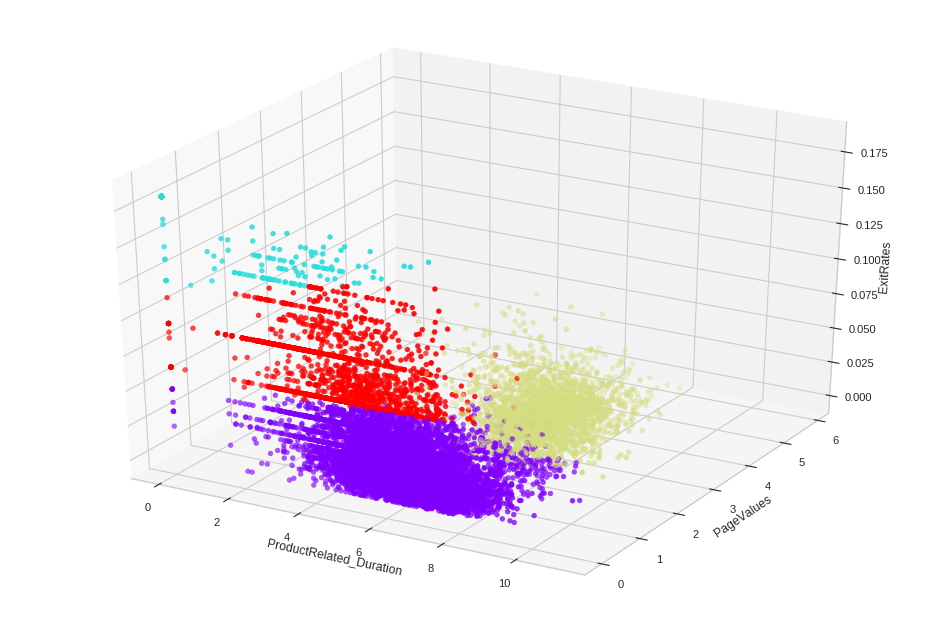

In [131]:
gmm = sklearn.mixture.GaussianMixture(n_components=4, covariance_type='tied', random_state=42)
gmm.fit(cluster_scaled1)
labels = gmm.predict(cluster_scaled1) 

print("DB for Gaussian Mixture Model:"+str(davies_bouldin_score(cluster_scaled1, labels)) )
print("Silhoutte Score for Gaussian Mixture Model:"+ str(silhouette_score(cluster_scaled1, labels))) 
print("Calinski Score for Gaussian Mixture Model:"+ str(calinski_harabasz_score(cluster_scaled1, labels)))
print("External Validation")
label_givenInData = y
print(adjusted_mutual_info_score(label_givenInData,labels))
print(metrics.homogeneity_completeness_v_measure(label_givenInData,labels))




fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_cluster_log1['ProductRelated_Duration'],DS_2_cluster_log1['PageValues'],DS_2_cluster_log1['ExitRates'],c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.2)
yLabel = ax.set_ylabel('PageValues', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("Mean shift")  


labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print(" Guassioan Mixture Models") 

In [132]:
DS2_clustered_GMM = DS_2_cluster_log1.assign(Cluster=labels)
grouped_gmm = DS2_clustered_GMM.groupby(['Cluster']).mean().round(1)
grouped_gmm

PageValues  ProductRelated_Duration  ExitRates
Cluster                                                
0               0.0                      6.4        0.0
1               0.0                      0.5        0.2
2               3.1                      7.1        0.0
3               0.0                      4.8        0.1

## Using covariance = diag

In [133]:
gmm = sklearn.mixture.GaussianMixture(n_components=4, covariance_type='diag', random_state=42)
gmm.fit(cluster_scaled1)
labels = gmm.predict(cluster_scaled1) 

print("DB for Gaussian Mixture Model:"+str(davies_bouldin_score(cluster_scaled1, labels)) )
print("Silhoutte Score for Gaussian Mixture Model:"+ str(silhouette_score(cluster_scaled1, labels))) 
print("Calinski Score for Gaussian Mixture Model:"+ str(calinski_harabasz_score(cluster_scaled1, labels)))
print("External Validation")
label_givenInData = y
print(adjusted_mutual_info_score(label_givenInData,labels))
print(metrics.homogeneity_completeness_v_measure(label_givenInData,labels))




fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_cluster_log1['ProductRelated_Duration'],DS_2_cluster_log1['PageValues'],DS_2_cluster_log1['ExitRates'],c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.2)
yLabel = ax.set_ylabel('PageValues', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("Mean shift")  


labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print(" Guassioan Mixture Models") 

DB for Gaussian Mixture Model:0.7056209358014951
Silhoutte Score for Gaussian Mixture Model:0.474284655649698
Calinski Score for Gaussian Mixture Model:16047.944946860403
External Validation
0.13126326979275532
(0.35775069033816387, 0.13135344818082656, 0.19215452523988155)
Mean shift
 Guassioan Mixture Models


/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [134]:
DS2_clustered_GMM = DS_2_cluster_log1.assign(Cluster=labels)
grouped_gmm = DS2_clustered_GMM.groupby(['Cluster']).mean().round(1)
grouped_gmm

PageValues  ProductRelated_Duration  ExitRates
Cluster                                                
0               0.0                      6.6        0.0
1               0.0                      0.0        0.2
2               2.8                      7.2        0.0
3               0.0                      4.8        0.1

# covariance_type='spherical'

In [135]:
gmm = sklearn.mixture.GaussianMixture(n_components=4, covariance_type='spherical', random_state=42)
gmm.fit(cluster_scaled1)
labels = gmm.predict(cluster_scaled1) 

print("DB for Gaussian Mixture Model:"+str(davies_bouldin_score(cluster_scaled1, labels)) )
print("Silhoutte Score for Gaussian Mixture Model:"+ str(silhouette_score(cluster_scaled1, labels))) 
print("Calinski Score for Gaussian Mixture Model:"+ str(calinski_harabasz_score(cluster_scaled1, labels)))
print("External Validation")
label_givenInData = y
print(adjusted_mutual_info_score(label_givenInData,labels))
print(metrics.homogeneity_completeness_v_measure(label_givenInData,labels))




fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_cluster_log1['ProductRelated_Duration'],DS_2_cluster_log1['PageValues'],DS_2_cluster_log1['ExitRates'],c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.2)
yLabel = ax.set_ylabel('PageValues', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)


labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print(" Guassioan Mixture Models") 

DB for Gaussian Mixture Model:0.6668725239534415
Silhoutte Score for Gaussian Mixture Model:0.5077072550031729
Calinski Score for Gaussian Mixture Model:17920.920194853523
External Validation
0.12974532413209242
(0.34384837011345154, 0.12983823020796553, 0.1884987407502374)
 Guassioan Mixture Models


/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [136]:
DS2_clustered_GMM = DS_2_cluster_log1.assign(Cluster=labels)
grouped_gmm = DS2_clustered_GMM.groupby(['Cluster']).mean().round(1)
grouped_gmm

PageValues  ProductRelated_Duration  ExitRates
Cluster                                                
0               0.0                      6.7        0.0
1               0.0                      0.0        0.2
2               3.0                      7.2        0.0
3               0.0                      4.4        0.1

# Afinity Propagation

In [137]:
"""from sklearn.cluster import AffinityPropagation
from sklearn.metrics.pairwise import euclidean_distances
preference = euclidean_distances(cluster_scaled1,cluster_scaled1).max()
af = AffinityPropagation(preference=8)
clustering=af.fit(cluster_scaled1)
af.get_params()
labels = af.predict(cluster_scaled1)



#print("DB for Affinity Propagation:"+str(davies_bouldin_score(cluster_scaled1, labels)) )
#print("Silhoutte Score for Affinity Propagation:"+ str(silhouette_score(cluster_scaled1, labels))) 
#print("Calinski Score forAffinity Propagation:"+ str(calinski_harabasz_score(cluster_scaled1, labels)))
print("External Validation")
label_givenInData = y
print(adjusted_mutual_info_score(label_givenInData,labels))
print(metrics.homogeneity_completeness_v_measure(label_givenInData,labels))




fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_cluster_log1['ProductRelated_Duration'],DS_2_cluster_log1['PageValues'],DS_2_cluster_log1['ExitRates'],c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.2)
yLabel = ax.set_ylabel('PageValues', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("Mean shift")  


labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("Affinity Propagation") 
"""

'from sklearn.cluster import AffinityPropagation\nfrom sklearn.metrics.pairwise import euclidean_distances\npreference = euclidean_distances(cluster_scaled1,cluster_scaled1).max()\naf = AffinityPropagation(preference=8)\nclustering=af.fit(cluster_scaled1)\naf.get_params()\nlabels = af.predict(cluster_scaled1)\n\n\n\n#print("DB for Affinity Propagation:"+str(davies_bouldin_score(cluster_scaled1, labels)) )\n#print("Silhoutte Score for Affinity Propagation:"+ str(silhouette_score(cluster_scaled1, labels))) \n#print("Calinski Score forAffinity Propagation:"+ str(calinski_harabasz_score(cluster_scaled1, labels)))\nprint("External Validation")\nlabel_givenInData = y\nprint(adjusted_mutual_info_score(label_givenInData,labels))\nprint(metrics.homogeneity_completeness_v_measure(label_givenInData,labels))\n\n\n\n\nfig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor=\'w\', edgecolor=\'k\')\nax = plt.axes(projection="3d")\n\nax.scatter3D(DS_2_cluster_log1[\'ProductRelated_Duration\'],D

# DBSCAN

DB for DB scan :1.1395439909674312
Silhoutte Score for DB scan:0.34969675374315173
Calinski Score for DB scan:16.877033528918357
0.00010408619233537054
(0.00021555562266344162, 0.017157707425281155, 0.0004257623104338125)
DBSCAN


/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


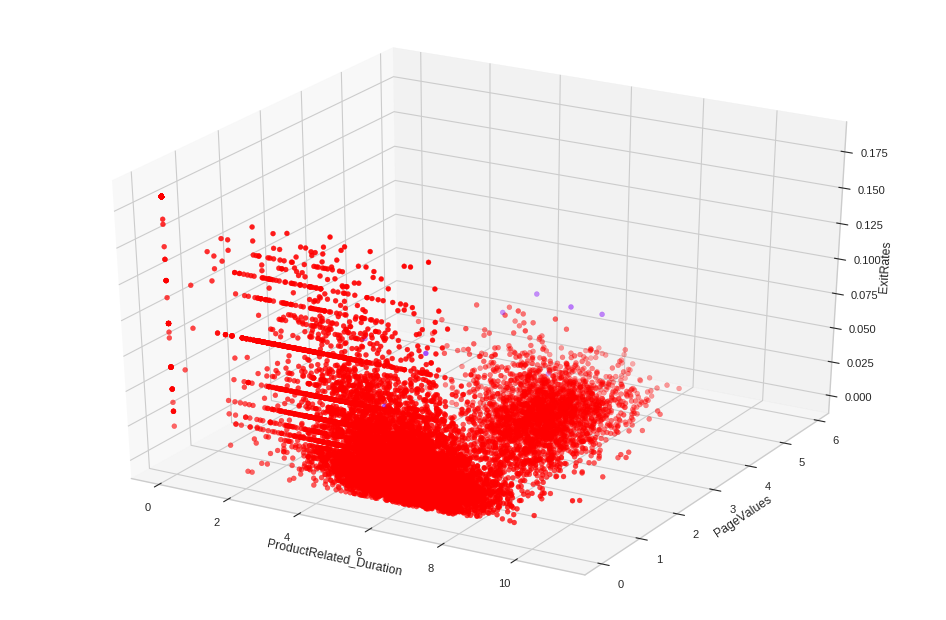

In [138]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=3).fit(cluster_scaled1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

print("DB for DB scan :"+str(davies_bouldin_score(cluster_scaled1, labels)) )
print("Silhoutte Score for DB scan:"+ str(silhouette_score(cluster_scaled1, labels))) 
print("Calinski Score for DB scan:"+ str(calinski_harabasz_score(cluster_scaled1, labels)))
label_givenInData = y
print(adjusted_mutual_info_score(label_givenInData,labels))
print(metrics.homogeneity_completeness_v_measure(label_givenInData,labels))



fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(DS_2_cluster_log1['ProductRelated_Duration'],DS_2_cluster_log1['PageValues'],DS_2_cluster_log1['ExitRates'],c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.2)
yLabel = ax.set_ylabel('PageValues', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("DBSCAN")

In [139]:
DS2_clustered_DB = DS_2_cluster_log1.assign(Cluster=labels)
grouped_DB = DS2_clustered_DB.groupby(['Cluster']).mean().round(2)
print(grouped_DB)


         PageValues  ProductRelated_Duration  ExitRates
Cluster                                                
-1             3.73                     4.89       0.05
 0             0.62                     5.97       0.04


# Changing Paramter using brute algo 

DB for DB scan :1.1395439909674312
Silhoutte Score for DB scan:0.34969675374315173
Calinski Score for DB scan:16.877033528918357
0.00010408619233537054
(0.00021555562266344162, 0.017157707425281155, 0.0004257623104338125)
DBSCAN


/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


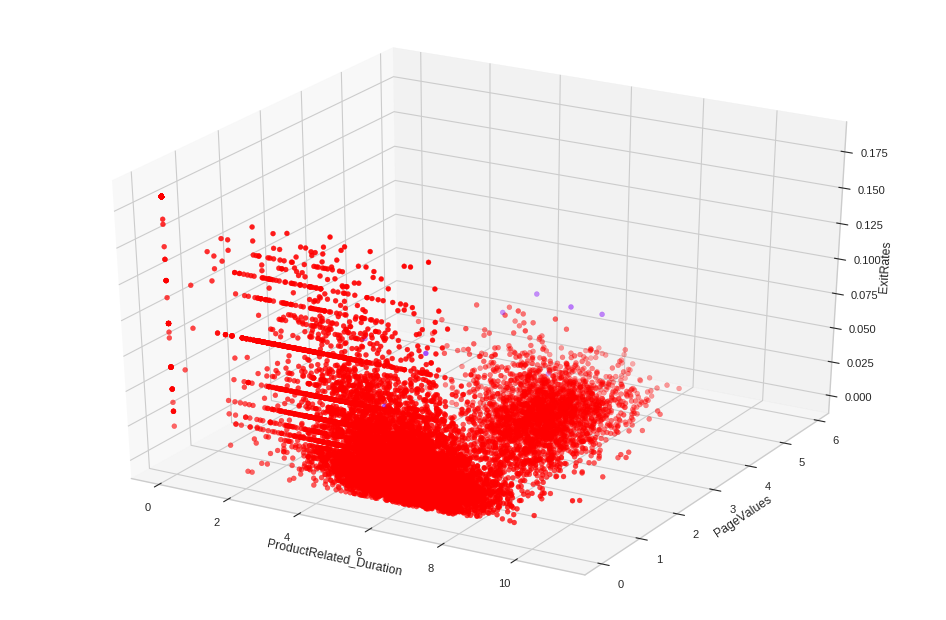

In [140]:
from sklearn.cluster import DBSCAN
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=3, algorithm='brute').fit(cluster_scaled1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

print("DB for DB scan :"+str(davies_bouldin_score(cluster_scaled1, labels)) )
print("Silhoutte Score for DB scan:"+ str(silhouette_score(cluster_scaled1, labels))) 
print("Calinski Score for DB scan:"+ str(calinski_harabasz_score(cluster_scaled1, labels)))
label_givenInData = y
print(adjusted_mutual_info_score(label_givenInData,labels))
print(metrics.homogeneity_completeness_v_measure(label_givenInData,labels))



fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(DS_2_cluster_log1['ProductRelated_Duration'],DS_2_cluster_log1['PageValues'],DS_2_cluster_log1['ExitRates'],c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.2)
yLabel = ax.set_ylabel('PageValues', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("DBSCAN")

In [141]:
DS2_clustered_DB = DS_2_cluster_log1.assign(Cluster=labels)
grouped_DB = DS2_clustered_DB.groupby(['Cluster']).mean().round(2)
print(grouped_DB)


         PageValues  ProductRelated_Duration  ExitRates
Cluster                                                
-1             3.73                     4.89       0.05
 0             0.62                     5.97       0.04


# Optic

/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/cluster/optics_.py:795: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


DB for DB scan :1.2318112165809534
Silhoutte Score for DB scan:0.2978124413802484
Calinski Score for DB scan:18.680917098835778
0.013942099574023467
(0.5522149727926371, 0.03470667843871725, 0.06530870840954656)
Optics


/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


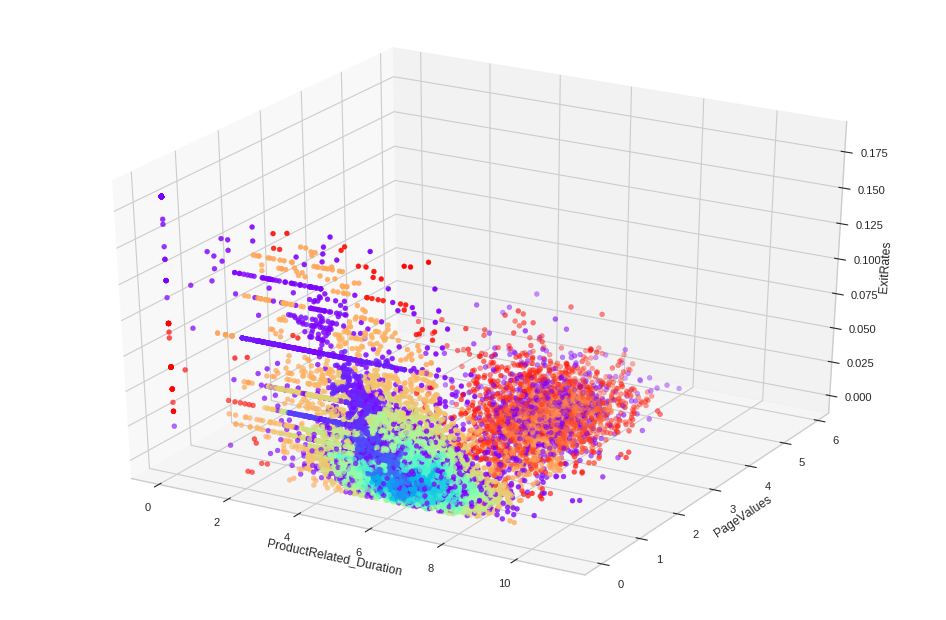

In [142]:
from sklearn.cluster import OPTICS

clustering = OPTICS(min_samples=2).fit(cluster_scaled1)
labels= clustering.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(DS_2_cluster_log1['ProductRelated_Duration'],DS_2_cluster_log1['PageValues'],DS_2_cluster_log1['ExitRates'],c=labels, cmap='rainbow')

print("DB for DB scan :"+str(davies_bouldin_score(cluster_scaled1, labels)) )
print("Silhoutte Score for DB scan:"+ str(silhouette_score(cluster_scaled1, labels))) 
print("Calinski Score for DB scan:"+ str(calinski_harabasz_score(cluster_scaled1, labels)))
label_givenInData = y
print(adjusted_mutual_info_score(label_givenInData,labels))
print(metrics.homogeneity_completeness_v_measure(label_givenInData,labels))


xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.2)
yLabel = ax.set_ylabel('PageValues', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("Optics")

In [143]:
DS2_clustered_DB = DS_2_cluster_log1.assign(Cluster=labels)
grouped_DB = DS2_clustered_DB.groupby(['Cluster']).mean().round(2)
print(grouped_DB)

         PageValues  ProductRelated_Duration  ExitRates
Cluster                                                
-1             0.92                     6.55       0.03
 0             0.00                     0.00       0.18
 1             0.00                     0.00       0.17
 2             0.00                     0.00       0.14
 3             0.00                     0.00       0.12
 4             0.00                     1.38       0.14
 5             0.00                     1.73       0.16
 6             0.00                     1.95       0.14
 7             0.00                     2.08       0.14
 8             0.00                     2.35       0.14
 9             0.00                     2.73       0.14
 10            0.00                     2.89       0.14
 11            0.00                     2.95       0.14
 12            0.00                     3.34       0.14
 13            0.00                     3.55       0.14
 14            0.00                     3.78    

# using ball_tree algo

/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/cluster/optics_.py:795: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


DB for optics :1.2318112165809534
Silhoutte Score for optics:0.2978124413802484
Calinski Score for optics:18.680917098835778
External Validation
0.013942099574023467
(0.5522149727926371, 0.03470667843871725, 0.06530870840954656)
Optics


/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


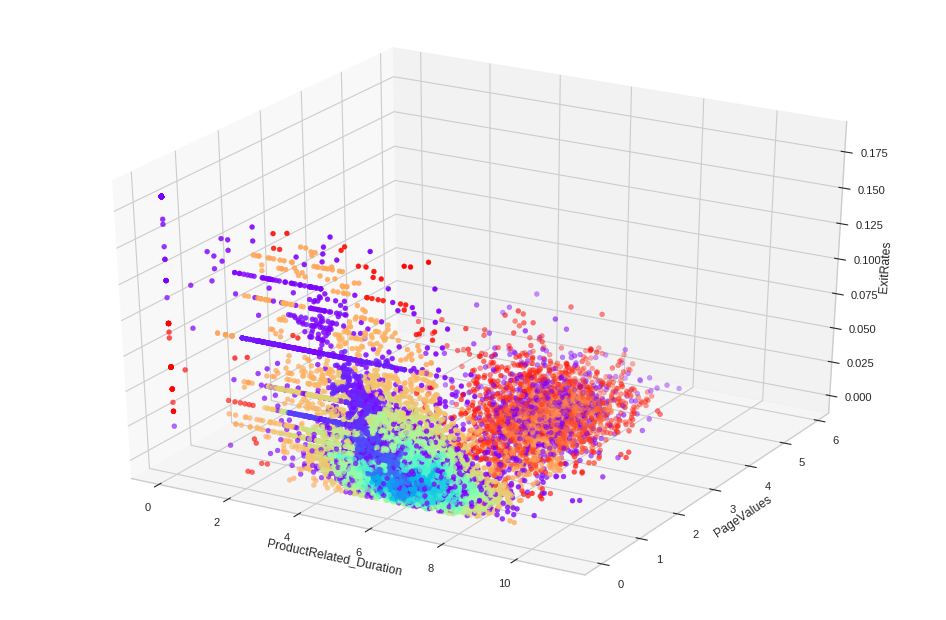

In [144]:
from sklearn.cluster import OPTICS

clustering = OPTICS(min_samples=2, algorithm='ball_tree').fit(cluster_scaled1)
labels= clustering.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(DS_2_cluster_log1['ProductRelated_Duration'],DS_2_cluster_log1['PageValues'],DS_2_cluster_log1['ExitRates'],c=labels, cmap='rainbow')

print("DB for optics :"+str(davies_bouldin_score(cluster_scaled1, labels)) )
print("Silhoutte Score for optics:"+ str(silhouette_score(cluster_scaled1, labels))) 
print("Calinski Score for optics:"+ str(calinski_harabasz_score(cluster_scaled1, labels)))
print("External Validation")
label_givenInData = y
print(adjusted_mutual_info_score(label_givenInData,labels))
print(metrics.homogeneity_completeness_v_measure(label_givenInData,labels))



xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.2)
yLabel = ax.set_ylabel('PageValues', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("Optics")

In [145]:
DS2_clustered_DB = DS_2_cluster_log1.assign(Cluster=labels)
grouped_DB = DS2_clustered_DB.groupby(['Cluster']).mean().round(2)
print(grouped_DB)

         PageValues  ProductRelated_Duration  ExitRates
Cluster                                                
-1             0.92                     6.55       0.03
 0             0.00                     0.00       0.18
 1             0.00                     0.00       0.17
 2             0.00                     0.00       0.14
 3             0.00                     0.00       0.12
 4             0.00                     1.38       0.14
 5             0.00                     1.73       0.16
 6             0.00                     1.95       0.14
 7             0.00                     2.08       0.14
 8             0.00                     2.35       0.14
 9             0.00                     2.73       0.14
 10            0.00                     2.89       0.14
 11            0.00                     2.95       0.14
 12            0.00                     3.34       0.14
 13            0.00                     3.55       0.14
 14            0.00                     3.78    

# 7. Result Analysis

From these models, we can choose the most well segmented model, that is k-means. We use the clusters from the that model to analyze the dataset.'



Algorithm K Mean is best among all algorithm it give Silhoutte Index close to 1,Calinski Index is higher,and DB index is lower.


Silhouette Index      0.58

Calinski Index        17074.41

DB Index              0.59

External Validation  0.183





In [146]:
grouped_kmeans

PageValues  ProductRelated_Duration  ExitRates
Cluster                                                
0               0.0                      6.3        0.0
1               0.0                      1.4        0.2
2               3.0                      7.2        0.0

In [147]:
df_clustered1 = OSIData.assign(Cluster=kmeans_labels)
df_clustered1.head()

Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                      0.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                     0.0             1.0                 0.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00       0.10         0.0         0.0      2                 2   
2         0.20       0.20         0.0         0.0      2                 4   
3         0.05       0.14         0.0         0.0      2                 3   
4         0.02       0.05         0.0         0.0      2                 3   

   Browser  Region  TrafficType  VisitorType  Weekend  Cluster  
0        1       1            1            2        0        1  
1        2       1            2            2        0        0  
2        1       9            3            2        0        1  
3        2       2            4            2        0        1  
4        3       1            4            2        1        0

In [148]:
df_clustered1["Cluster"].value_counts()

0    8620
2    2467
1    1229
Name: Cluster, dtype: int64

In [149]:
df_clustered2= DS_2_cluster.assign(Cluster=kmeans_labels)
df_clustered2.head()

Administrative_Duration  Informational_Duration  ProductRelated_Duration  \
0                      0.0                     0.0                 0.000000   
1                      0.0                     0.0                64.000000   
2                      0.0                     0.0                 0.000000   
3                      0.0                     0.0                 2.666667   
4                      0.0                     0.0               627.500000   

   ExitRates  PageValues  TrafficType  Browser  Region  Cluster  
0       0.20         0.0            1        1       1        1  
1       0.10         0.0            2        2       1        0  
2       0.20         0.0            3        1       9        1  
3       0.14         0.0            4        2       2        1  
4       0.05         0.0            4        3       1        0

# Result with df_clustered1

In [150]:
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in categorical[0:4]:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = df_clustered1, hue=df_clustered1['Cluster'], x = cat)
    plt.xticks(rotation=30)
plt.show()

In [151]:
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in categorical[4:len(categorical)-1]:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = df_clustered1, hue=df_clustered1['Cluster'], x = cat)
    plt.xticks(rotation=30)
plt.show()

Above are figures of the clusters distribution on each categorical feature.



# Summaries

After comparing three kind of clustering models, we decide to use k-means as the model
The data divided into three clusters
The three clusters can be used to determine the visitor purchased or not 
Each of the cluster have their own characteristics